In [1]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
rose_df = pd.read_csv("/content/drive/MyDrive/Time Series Forecasting/Rose.csv")

In [3]:
rose_df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [4]:
rose_df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [5]:
rose_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [6]:
rose_df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

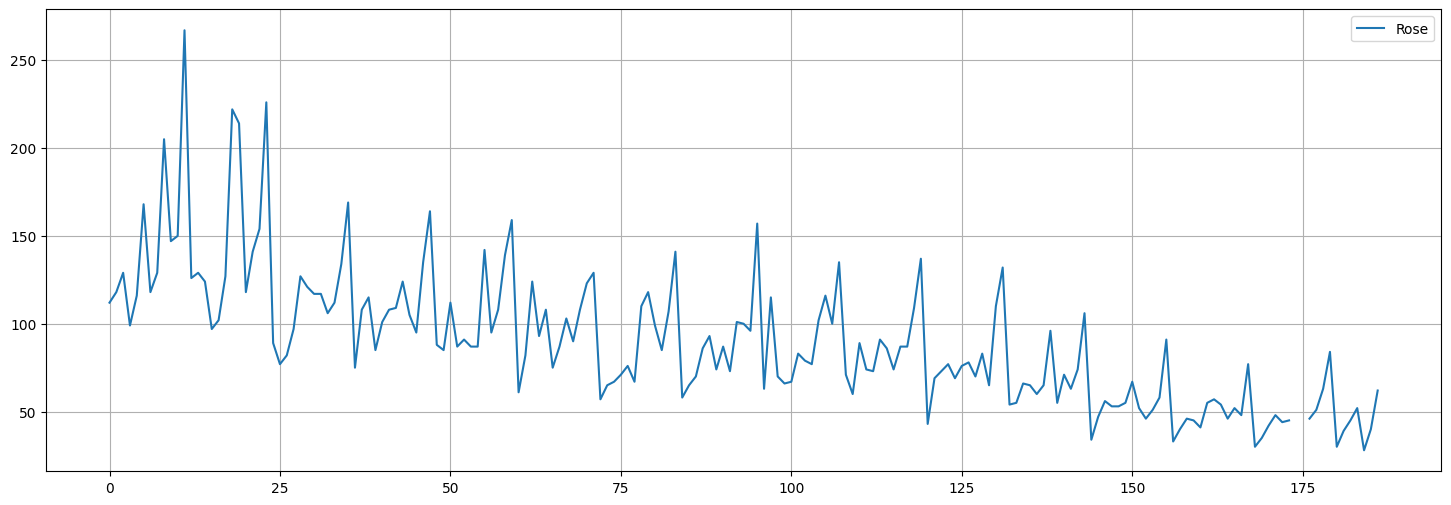

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,6
rose_df.plot()
plt.grid();

In [8]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [9]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [10]:
rose_df['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
rose_df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [11]:
rose_df['Time_Stamp'] = pd.to_datetime(rose_df['Time_Stamp'])

In [12]:
rose_df = rose_df.set_index('Time_Stamp')
rose_df.drop(['YearMonth'], axis=1, inplace=True)
rose_df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

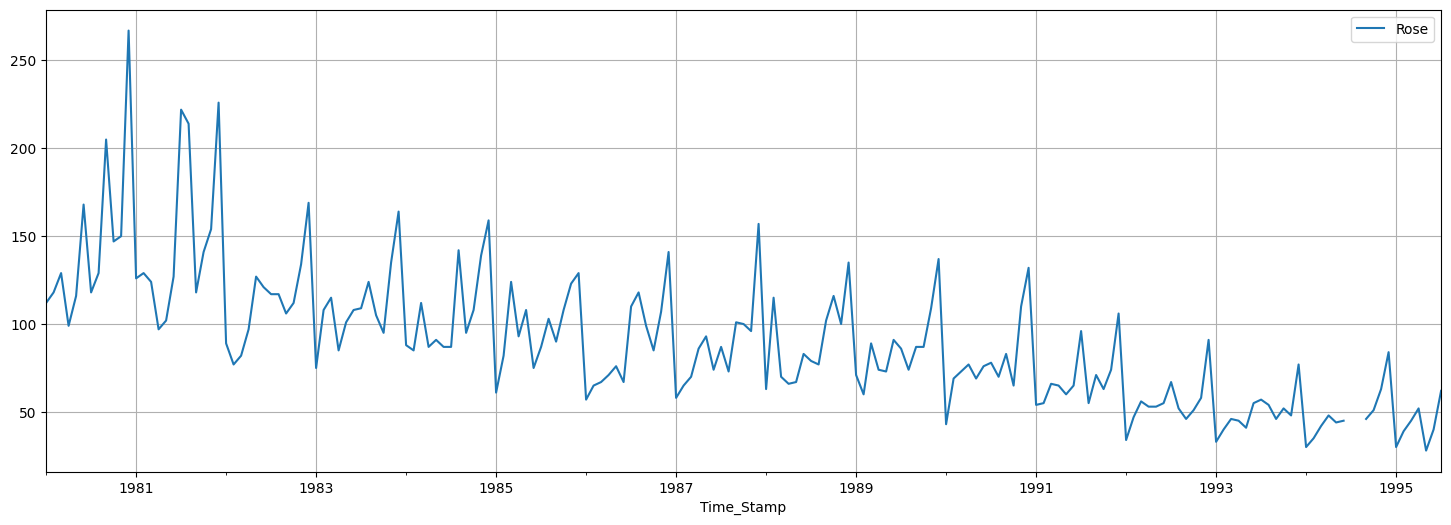

In [13]:
rose_df.plot();
plt.grid();

In [14]:
rose_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [15]:
print('Missing Values in the Dataset')
print('______________________________')
msv = rose_df.isnull().sum()[rose_df.isnull().sum() > 0]

if msv.empty:
    print('There are no missing values in the data.')
else:
    for column, missing_count in msv.items():
        missing_percentage = (missing_count / len(rose_df)) * 100
        print('{} has {} missing values, which is {:.2f}% of total data'.format(column, missing_count, missing_percentage))

Missing Values in the Dataset
______________________________
Rose has 2 missing values, which is 1.07% of total data


In [16]:
rose_df[rose_df['Rose'].isna()]

Rose
Time_Stamp      
1994-07-31   NaN
1994-08-31   NaN

<Axes: xlabel='Time_Stamp'>

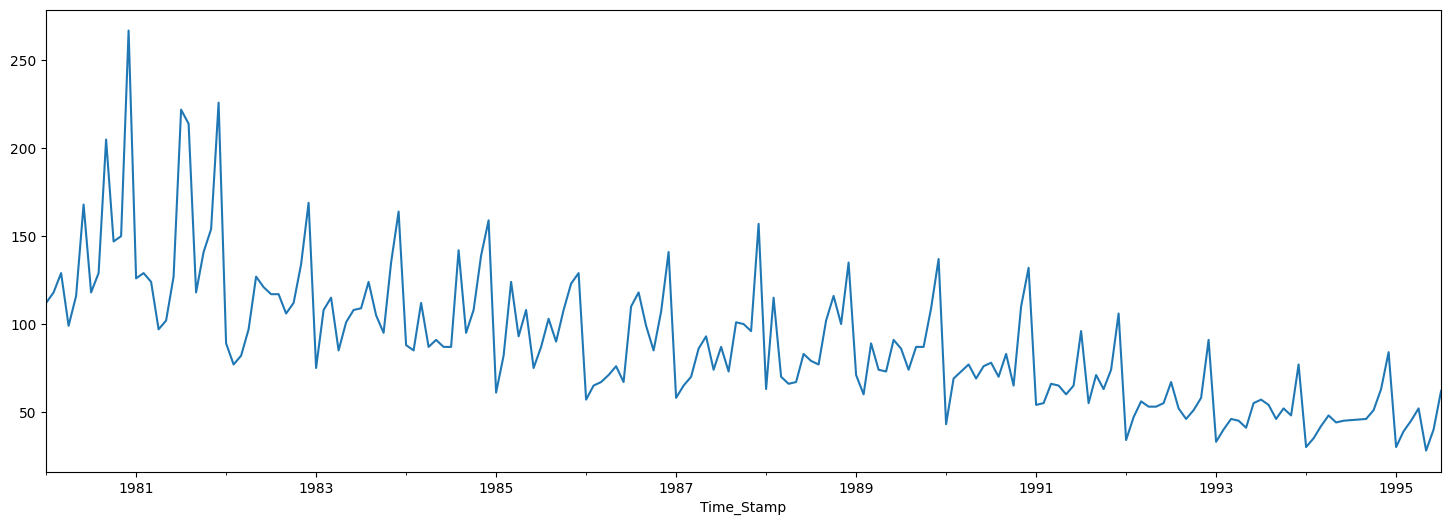

In [17]:
rose_df['Rose'].interpolate('linear').plot()

In [18]:
rose_df = rose_df.resample('M').mean().interpolate('linear')
rose_df[(rose_df.index >= '1994-07-31')&(rose_df.index <= '1994-08-31')]

Rose
Time_Stamp           
1994-07-31  45.333333
1994-08-31  45.666667

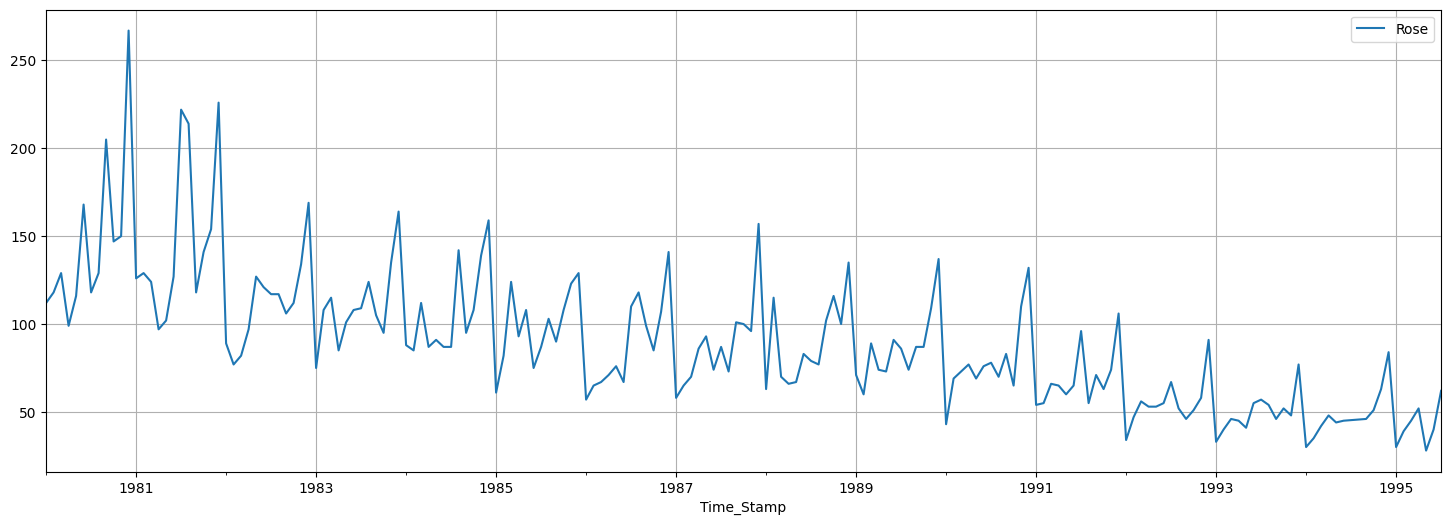

In [19]:
rose_df.plot();
plt.grid();

In [20]:
rose_df.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

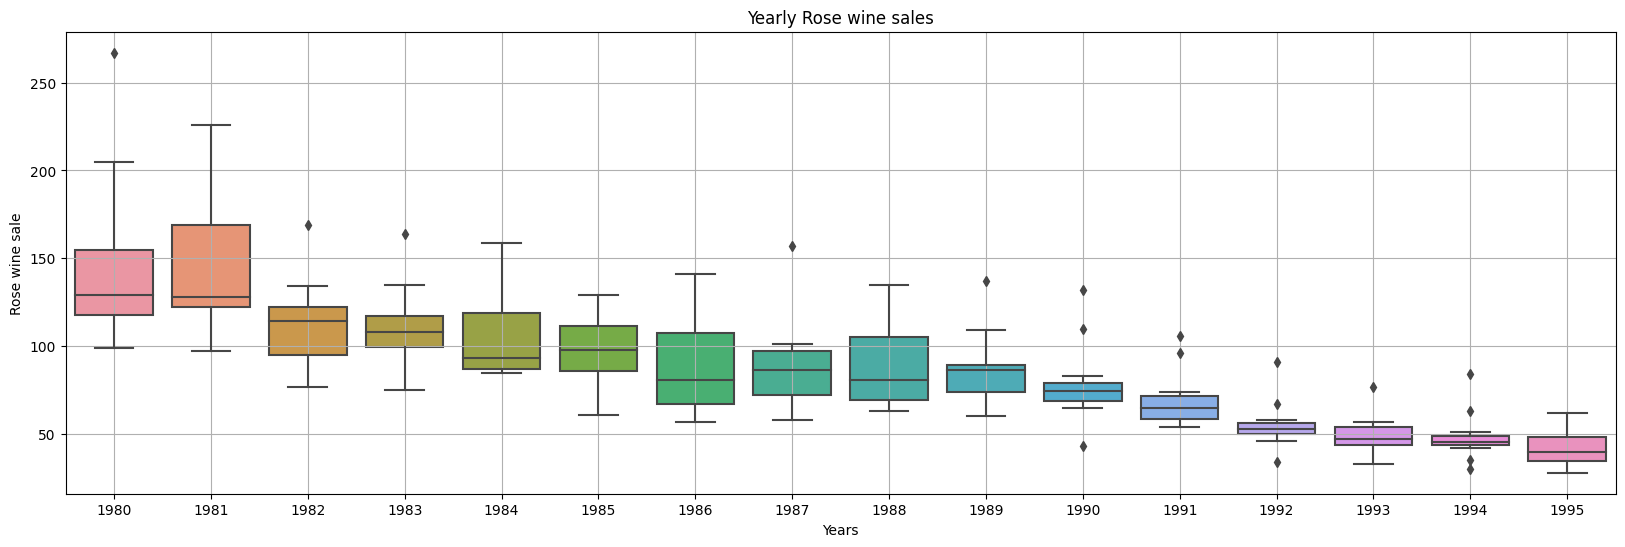

In [21]:
fig,ax=plt.subplots(figsize=(20,6))
sns.boxplot(x=rose_df.index.year,y=rose_df.Rose,ax=ax,whis=1.5)
plt.grid();
plt.xlabel("Years")
plt.ylabel("Rose wine sale")
plt.title("Yearly Rose wine sales");

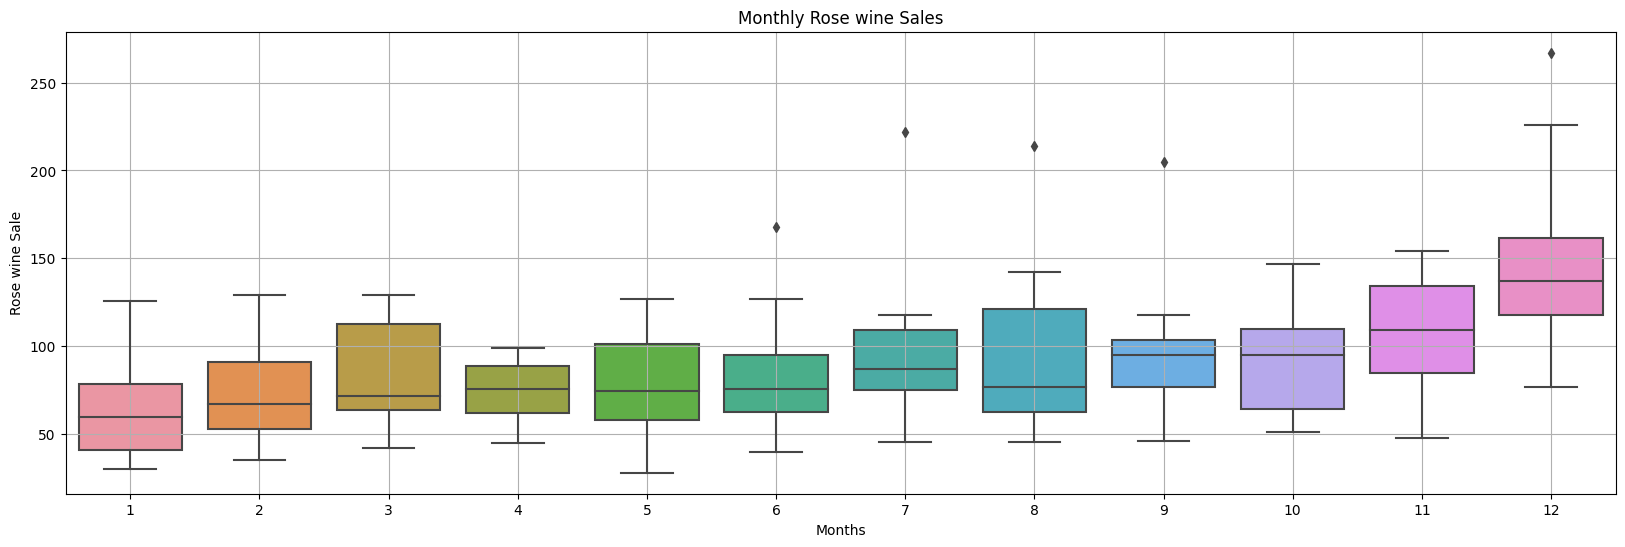

In [22]:
fig,ax=plt.subplots(figsize=(20,6))
sns.boxplot(x=rose_df.index.month,y=rose_df.Rose,ax=ax,whis=1.5)
plt.grid();
plt.xlabel("Months")
plt.ylabel("Rose wine Sale")
plt.title("Monthly Rose wine Sales");

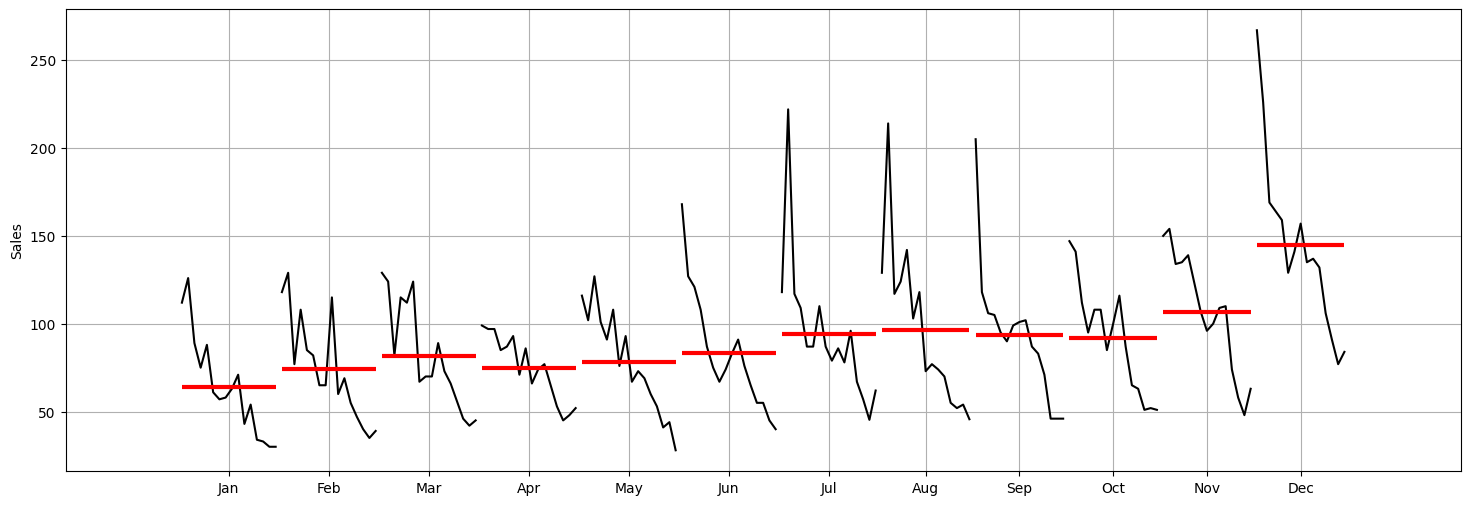

In [23]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(rose_df['Rose'],ylabel='Sales')
plt.grid();

In [24]:
monthly_sales_across_years = pd.pivot_table(rose_df, values = 'Rose', columns = rose_df.index.month,
                                        index = rose_df.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3     4      5      6           7           8   \
Time_Stamp                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Time_Stamp     9      10     11     12  
Time_Stamp                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

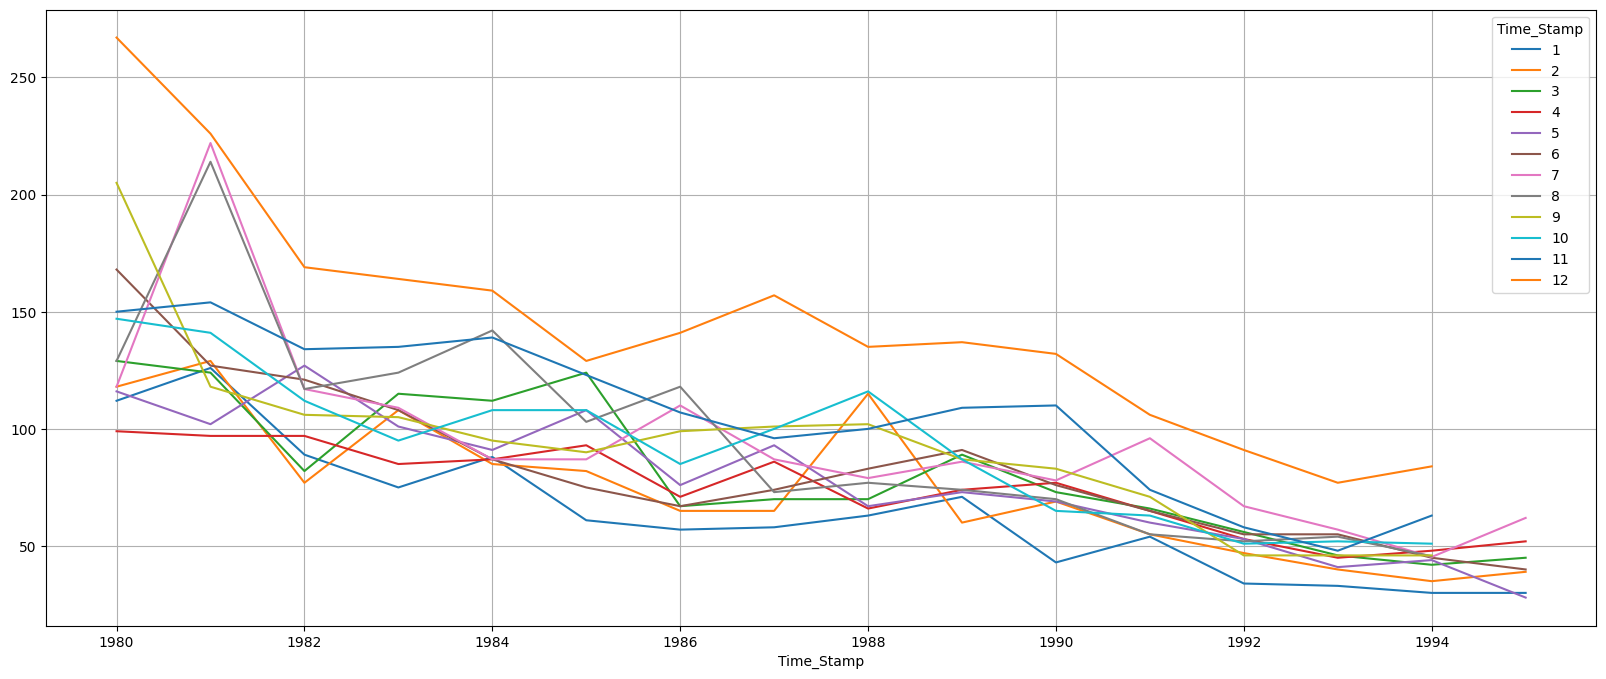

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
monthly_sales_across_years.plot(ax=ax)
plt.grid();

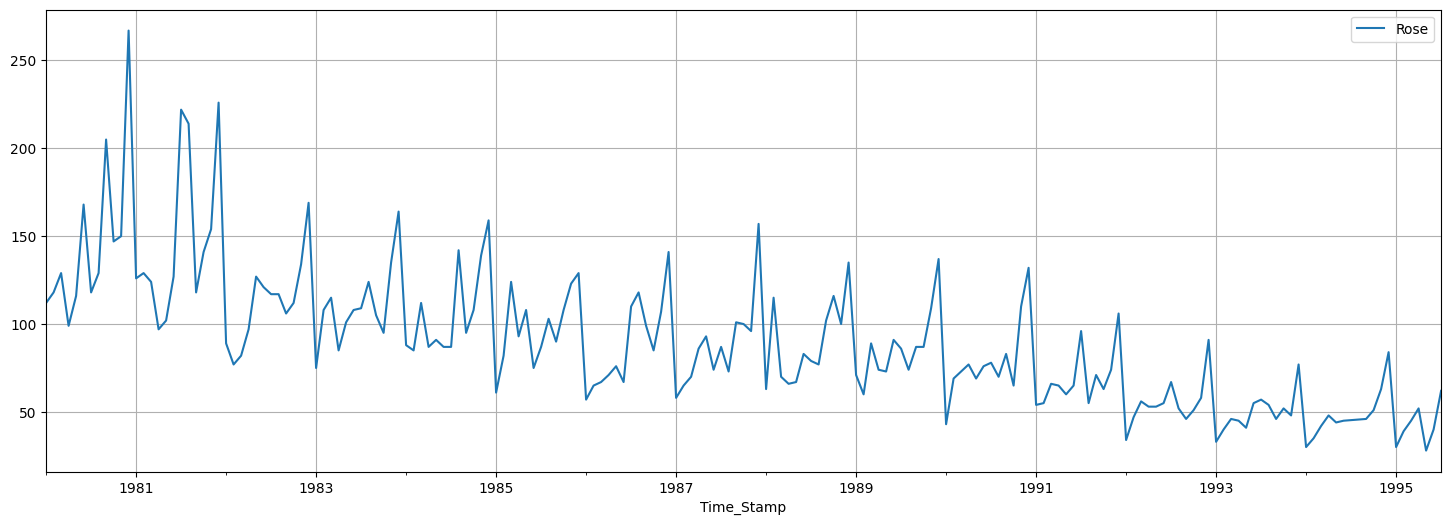

In [26]:
rose_df.plot()
plt.grid();

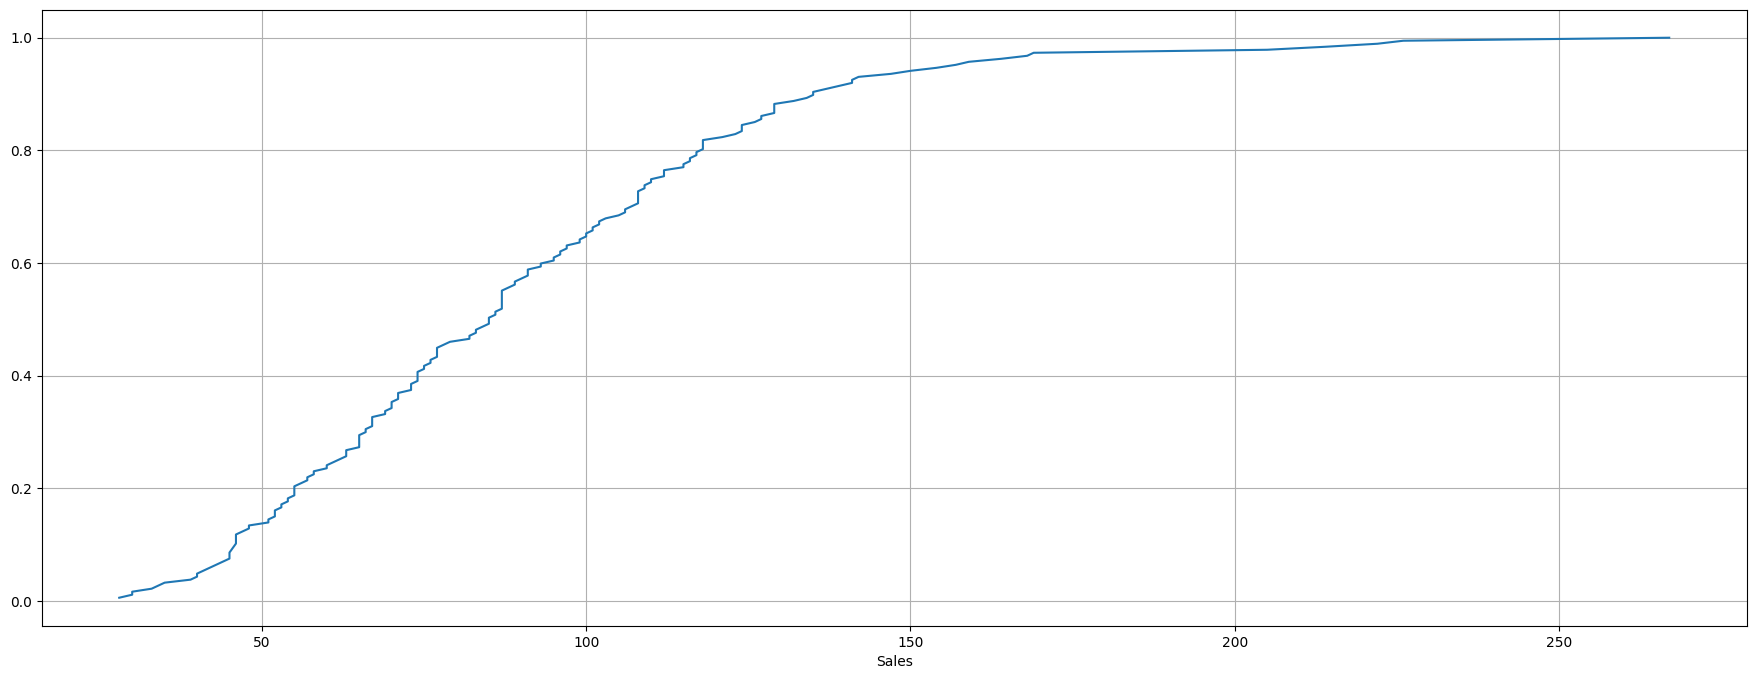

In [27]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (22, 8))
cdf = ECDF(rose_df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [28]:
rose_df_yearly_sum = rose_df.resample('A').sum()
rose_df_yearly_sum.head()

Rose
Time_Stamp        
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

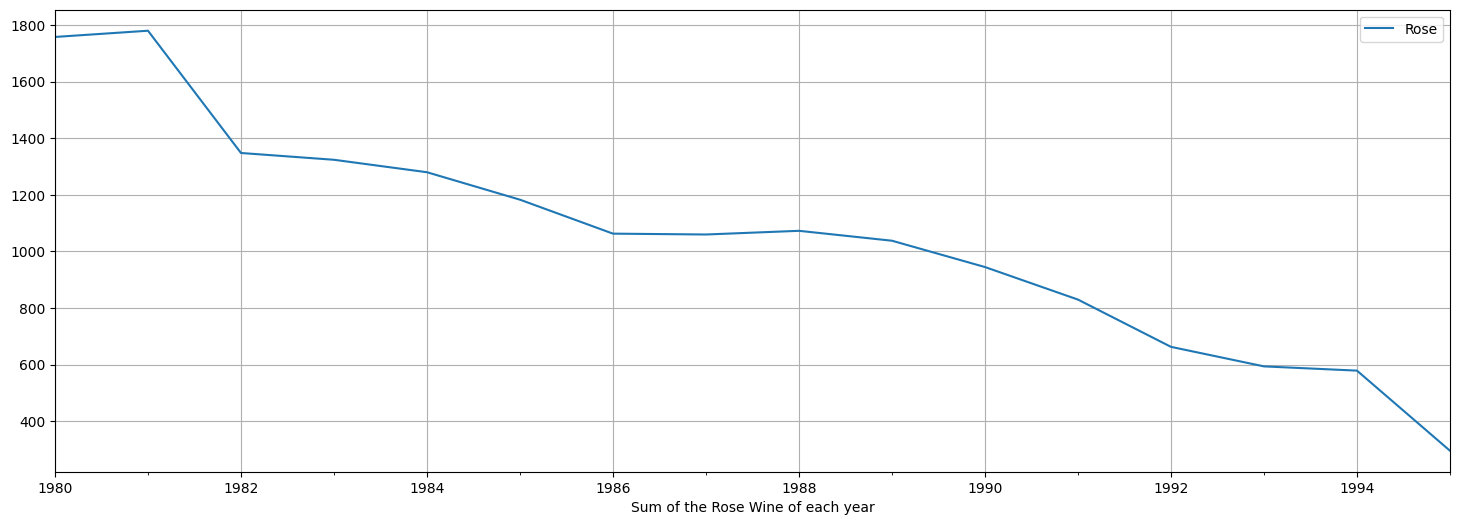

In [29]:
rose_df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Rose Wine of each year');

In [30]:
rose_df_yearly_mean = rose_df.resample('Y').mean().round(2)
rose_df_yearly_mean.head()

Rose
Time_Stamp        
1980-12-31  146.50
1981-12-31  148.33
1982-12-31  112.33
1983-12-31  110.33
1984-12-31  106.67

In [31]:
rose_df_quarterly_sum = rose_df.resample('Q').sum()
rose_df_quarterly_sum.head()

Rose
Time_Stamp       
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

In [32]:
rose_df_quarterly_mean = rose_df.resample('Q').mean()
rose_df_quarterly_mean.head()

Rose
Time_Stamp            
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333

In [33]:
rose_df_decade_sum = rose_df.resample('10Y').sum()
rose_df_decade_sum

Rose
Time_Stamp         
1980-12-31   1758.0
1990-12-31  12094.0
2000-12-31   2962.0

In [34]:
rose_df_decade_sum = rose_df.resample('10Y').mean()
rose_df_decade_sum

Rose
Time_Stamp            
1980-12-31  146.500000
1990-12-31  100.783333
2000-12-31   53.854545

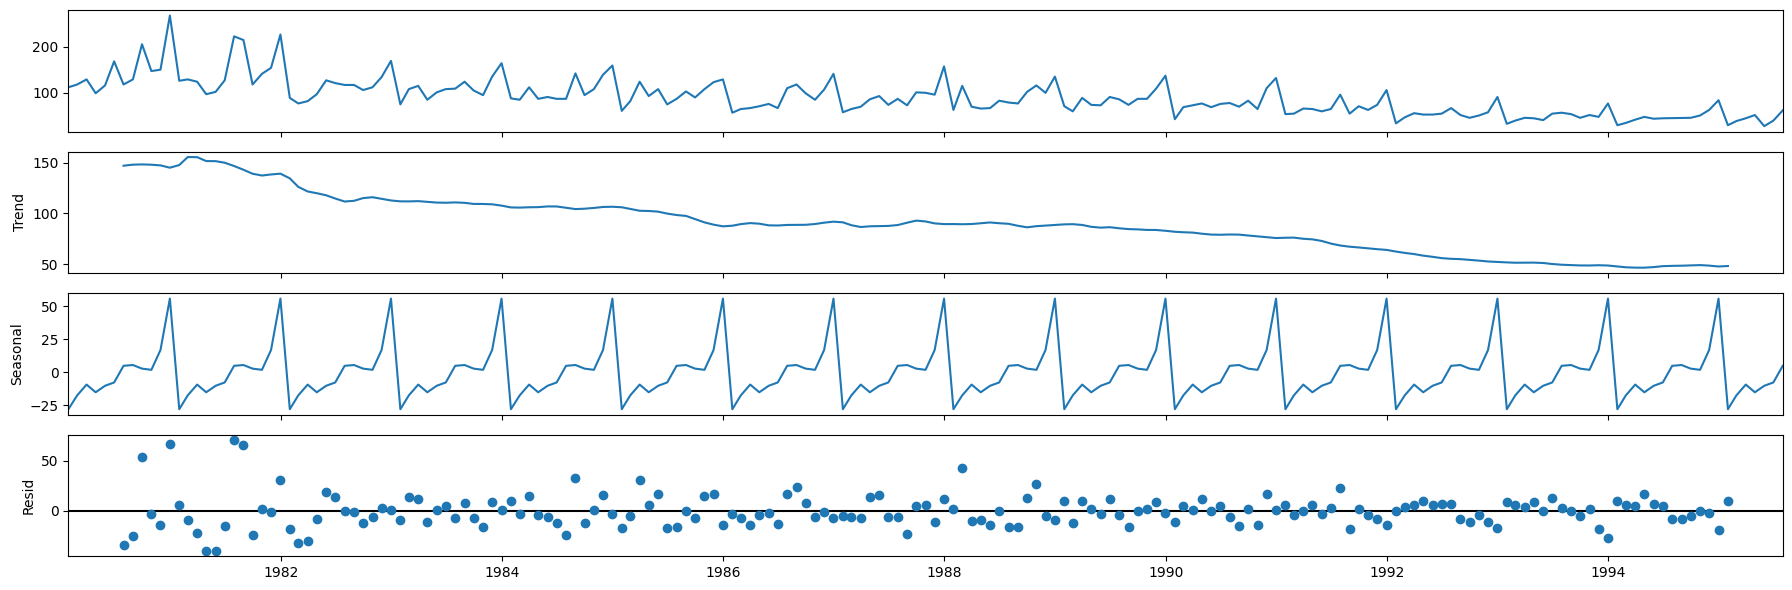

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rose_df,model='additive')
decomposition.plot();

In [36]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [37]:
print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 Time_Stamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31       NaN
1980-04-30       NaN
1980-05-31       NaN
1980-06-30       NaN
1980-07-31    147.08
1980-08-31    148.12
1980-09-30    148.37
1980-10-31    148.08
1980-11-30    147.42
1980-12-31    145.12
Freq: M, Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.91
1980-02-29   -17.44
1980-03-31    -9.29
1980-04-30   -15.10
1980-05-31   -10.20
1980-06-30    -7.68
1980-07-31     4.90
1980-08-31     5.50
1980-09-30     2.77
1980-10-31     1.87
1980-11-30    16.85
1980-12-31    55.71
Freq: M, Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31      NaN
1980-02-29      NaN
1980-03-31      NaN
1980-04-30      NaN
1980-05-31      NaN
1980-06-30      NaN
1980-07-31   -33.98
1980-08-31   -24.62
1980-09-30    53.85
1980-10-31    -2.96
1980-11-30   -14.26
1980-12-31    66.16
Freq: M, Name: resid, dtype: float64 



In [38]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.round(2).head(12)

Time_Stamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31       NaN
1980-04-30       NaN
1980-05-31       NaN
1980-06-30       NaN
1980-07-31    113.10
1980-08-31    123.50
1980-09-30    202.23
1980-10-31    145.13
1980-11-30    133.15
1980-12-31    211.29
Freq: M, dtype: float64

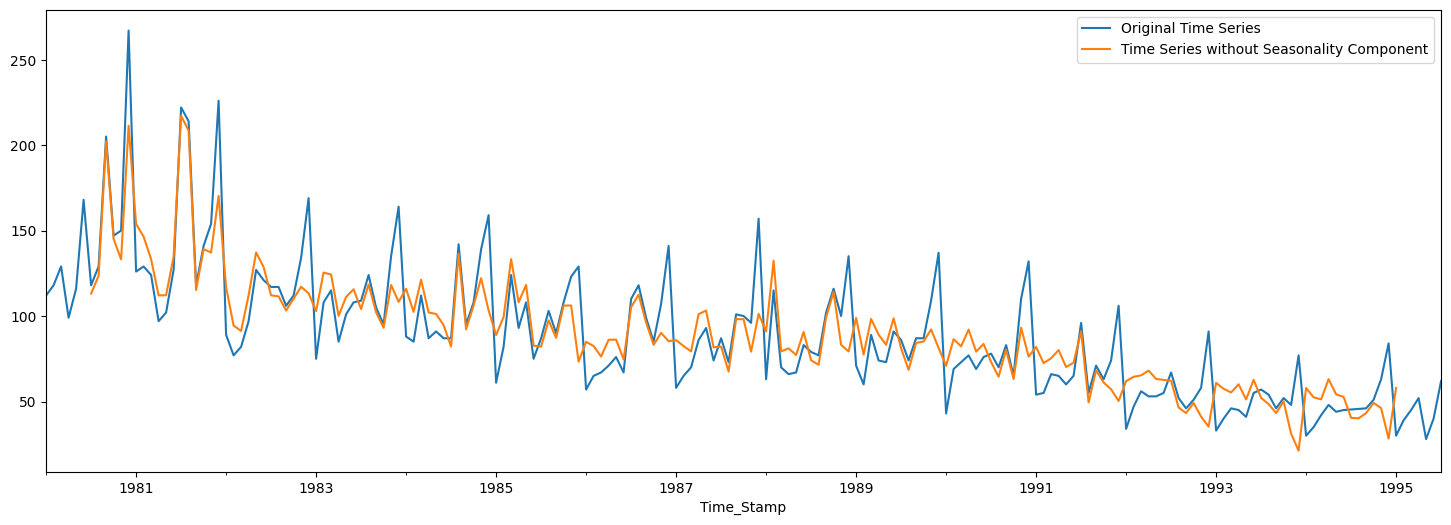

In [39]:
rose_df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

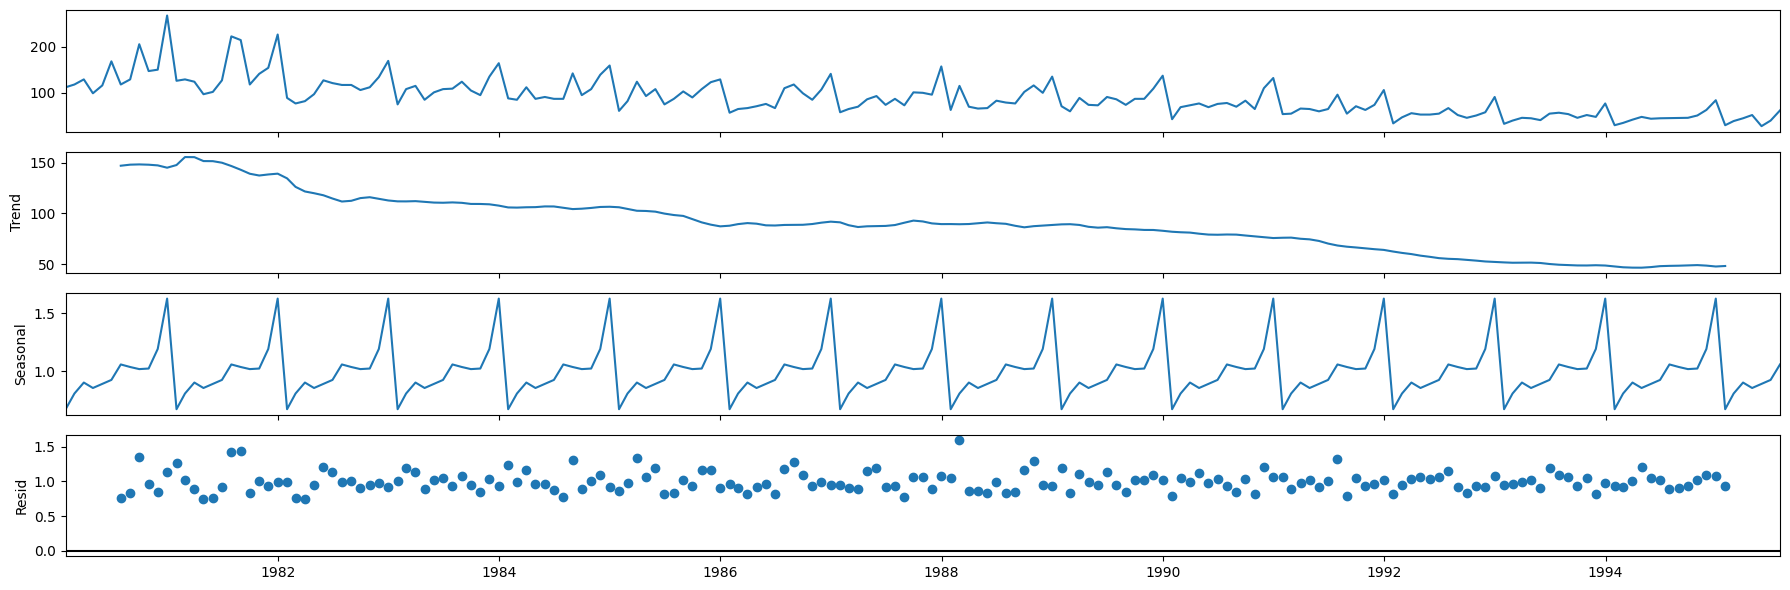

In [40]:
decomposition_mul = seasonal_decompose(rose_df,model='multiplicative')
decomposition_mul.plot();

In [41]:
trend_mul = decomposition_mul.trend
seasonality_mul = decomposition_mul.seasonal
residual_mul = decomposition_mul.resid

In [42]:
print('Trend','\n',trend_mul.round(2).head(12),'\n')
print('Seasonality','\n',seasonality_mul.round(2).head(12),'\n')
print('Residual','\n',residual_mul.round(2).head(12),'\n')

Trend 
 Time_Stamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31       NaN
1980-04-30       NaN
1980-05-31       NaN
1980-06-30       NaN
1980-07-31    147.08
1980-08-31    148.12
1980-09-30    148.37
1980-10-31    148.08
1980-11-30    147.42
1980-12-31    145.12
Freq: M, Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.67
1980-02-29    0.81
1980-03-31    0.90
1980-04-30    0.85
1980-05-31    0.89
1980-06-30    0.92
1980-07-31    1.06
1980-08-31    1.04
1980-09-30    1.02
1980-10-31    1.02
1980-11-30    1.19
1980-12-31    1.63
Freq: M, Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31     NaN
1980-02-29     NaN
1980-03-31     NaN
1980-04-30     NaN
1980-05-31     NaN
1980-06-30     NaN
1980-07-31    0.76
1980-08-31    0.84
1980-09-30    1.36
1980-10-31    0.97
1980-11-30    0.85
1980-12-31    1.13
Freq: M, Name: resid, dtype: float64 



In [43]:
deaseasonalized_ts_mul = trend_mul + residual_mul
deaseasonalized_ts_mul.round(2).head(12)

Time_Stamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31       NaN
1980-04-30       NaN
1980-05-31       NaN
1980-06-30       NaN
1980-07-31    147.84
1980-08-31    148.97
1980-09-30    149.73
1980-10-31    149.05
1980-11-30    148.27
1980-12-31    146.25
Freq: M, dtype: float64

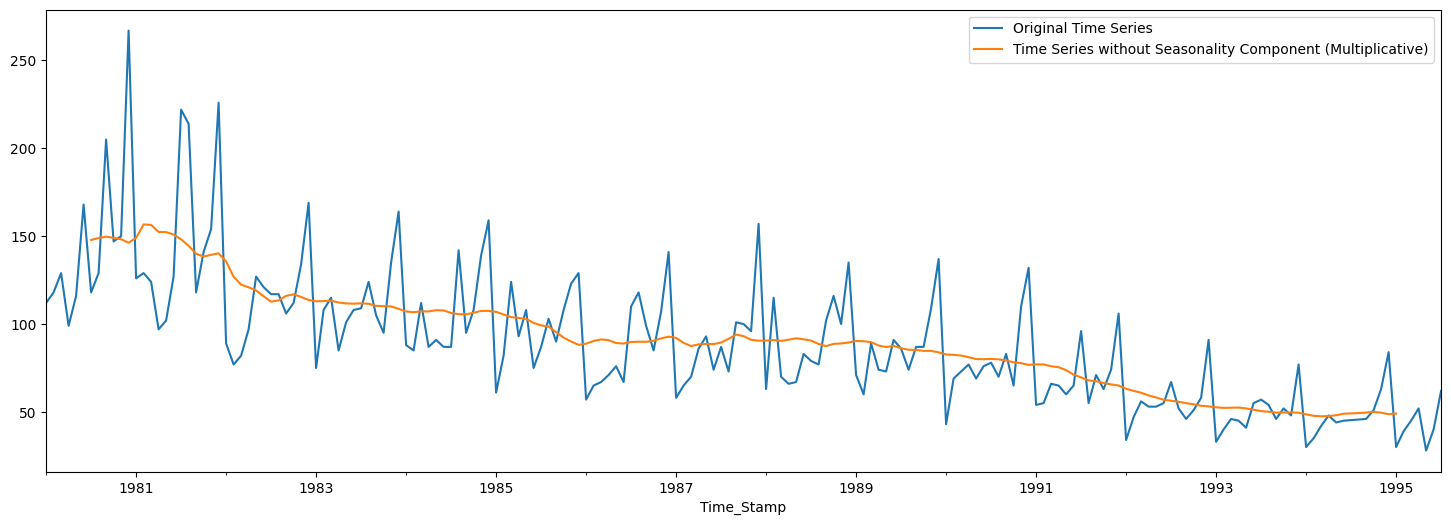

In [44]:
rose_df.plot()
deaseasonalized_ts_mul.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component (Multiplicative)"]);

In [45]:
train = rose_df[rose_df.index.year < 1991]
test = rose_df[rose_df.index.year >= 1991]

In [46]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [47]:
from IPython.display import display

In [48]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

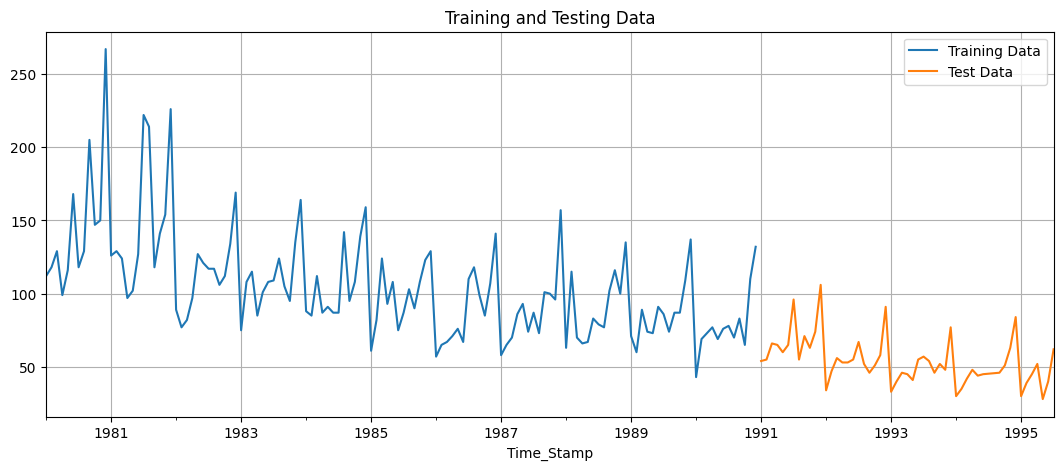

In [49]:
train['Rose'].plot(figsize=(13,5),fontsize=10)
test['Rose'].plot(figsize=(13,5),fontsize=10)
plt.grid()
plt.title("Training and Testing Data")
plt.legend(['Training Data','Test Data'])
plt.show()

In [50]:
range(len(train))

range(0, 132)

In [51]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [52]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [53]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5

Last few rows of Training Data


Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132

First few rows of Test Data


Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137

Last few rows of Test Data


Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()
lr.fit(LinearRegression_train[["time"]],LinearRegression_train["Rose"].values)

LinearRegression()

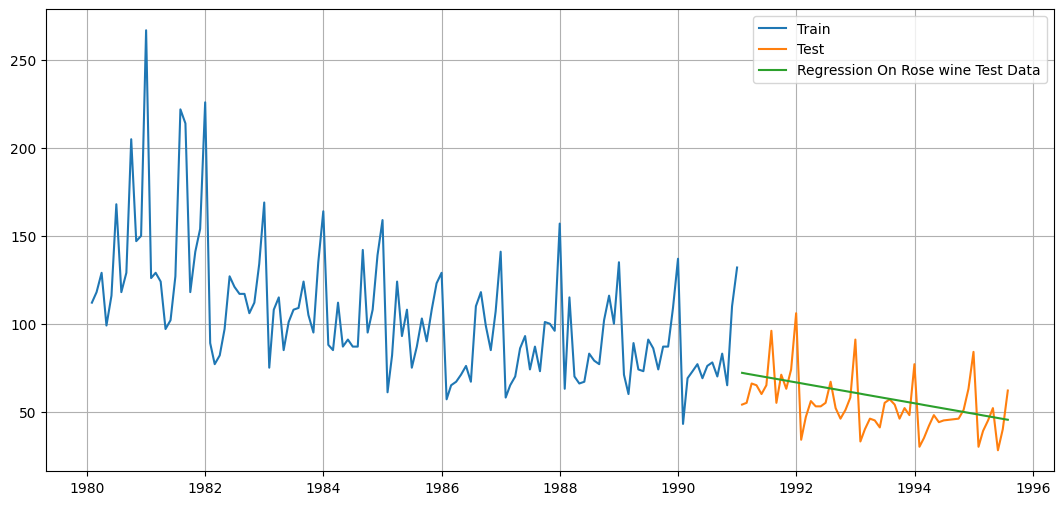

In [56]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Rose wine Test Data')
plt.legend(loc='best')
plt.grid();

In [57]:
from sklearn import metrics

In [58]:
rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
print("RSME for lr_model1 is: ",rmse_model1_train)

RSME for lr_model1 is:  30.718135411331016


In [59]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("RSME for lr_model1 is: ",rmse_model1_test)

RSME for lr_model1 is:  15.268955197146555


In [60]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  15.268955

##Naive Approach

In [61]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [62]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Freq: M, Name: naive, dtype: float64

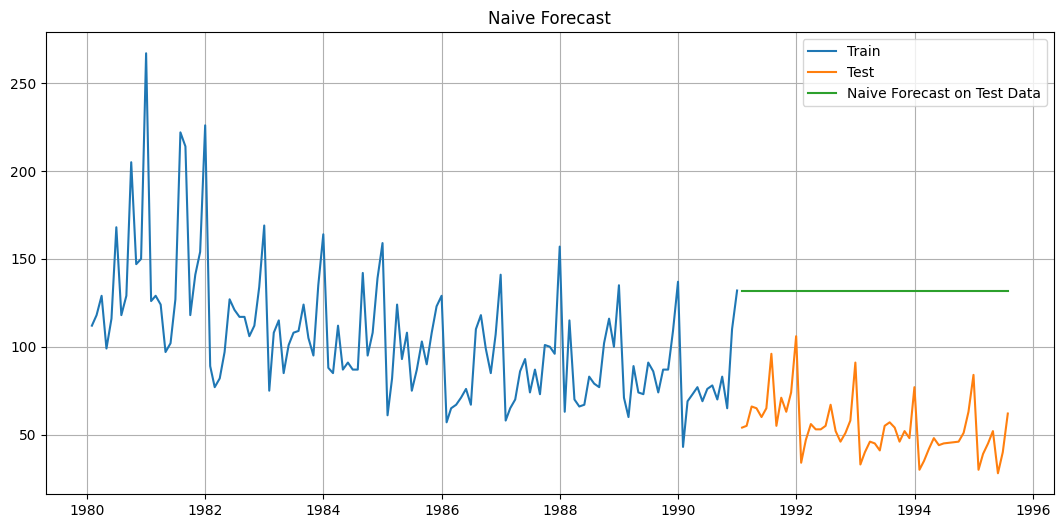

In [63]:
plt.figure(figsize=(13,6))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [64]:
rmse_model2_test=metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("RMSE for lr_model 2 is: " ,rmse_model2_test)

RMSE for lr_model 2 is:  79.71877337417347


In [65]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  15.268955
NaiveModel        79.718773

##Simple Average

In [66]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [67]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

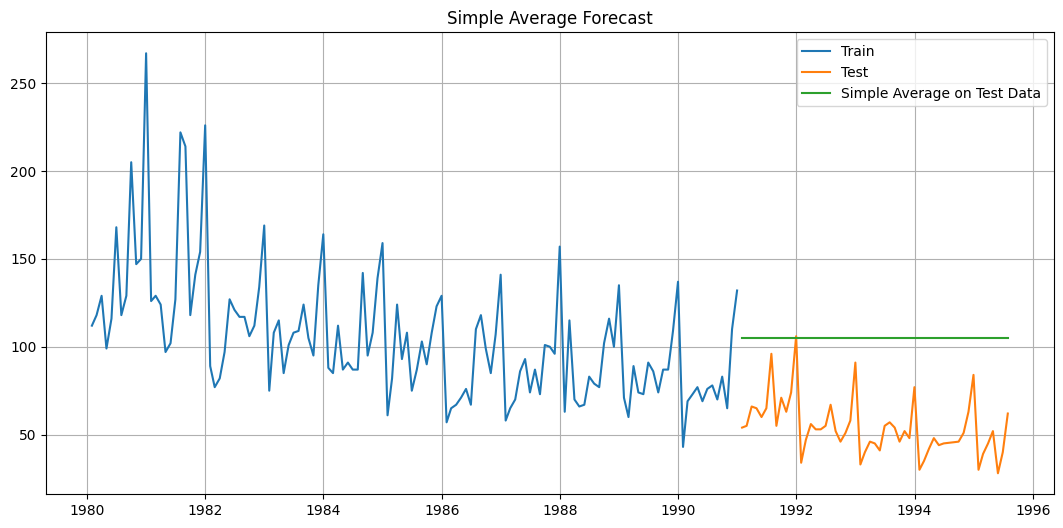

In [68]:
plt.figure(figsize=(13,6))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [69]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("RMSE for lr_model 3 is: " ,rmse_model3_test)

RMSE for lr_model 3 is:  53.460569646114436


In [70]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    15.268955
NaiveModel          79.718773
SimpleAverageModel  53.460570

##Moving Average

In [71]:
MovingAverage = rose_df.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [72]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

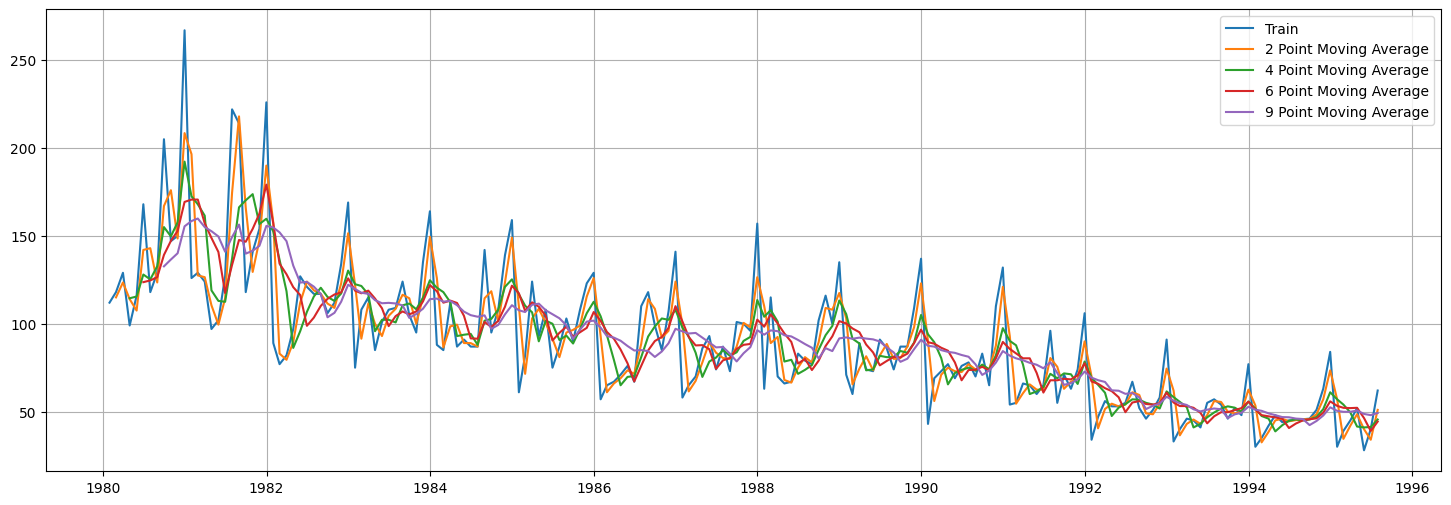

In [73]:
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [74]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

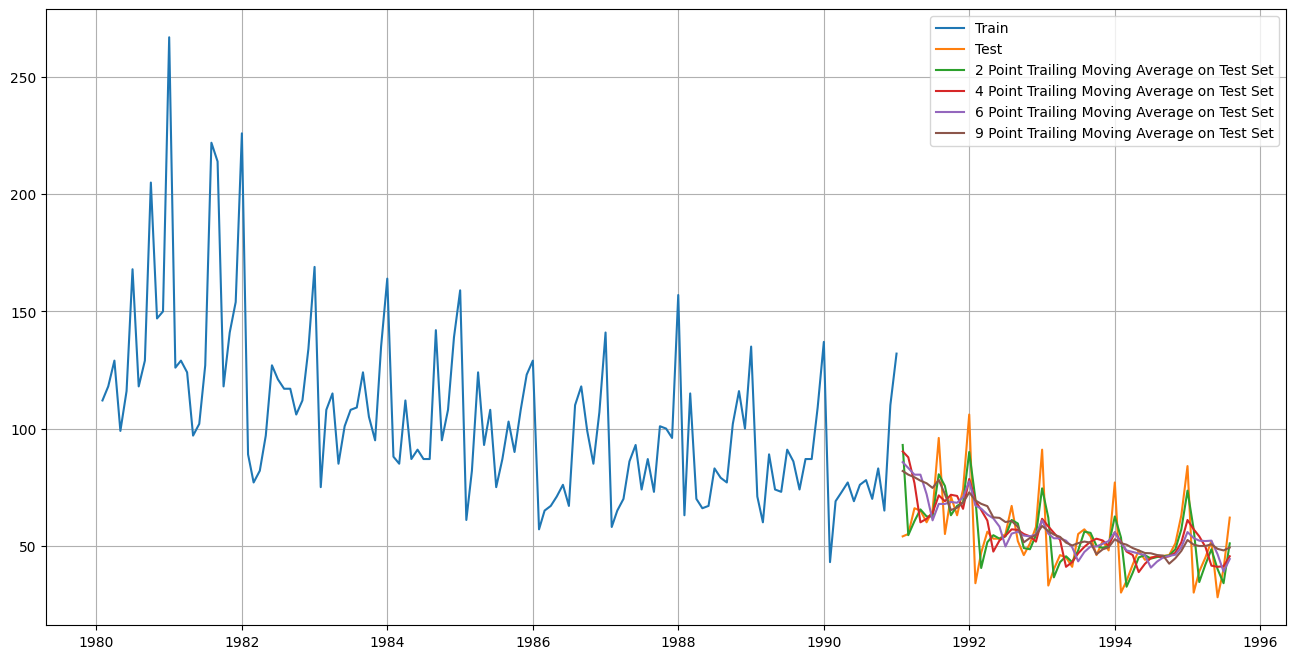

In [75]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [76]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [77]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             15.268955
NaiveModel                   79.718773
SimpleAverageModel           53.460570
2pointTrailingMovingAverage  11.529278
4pointTrailingMovingAverage  14.451403
6pointTrailingMovingAverage  14.566327
9pointTrailingMovingAverage  14.727630

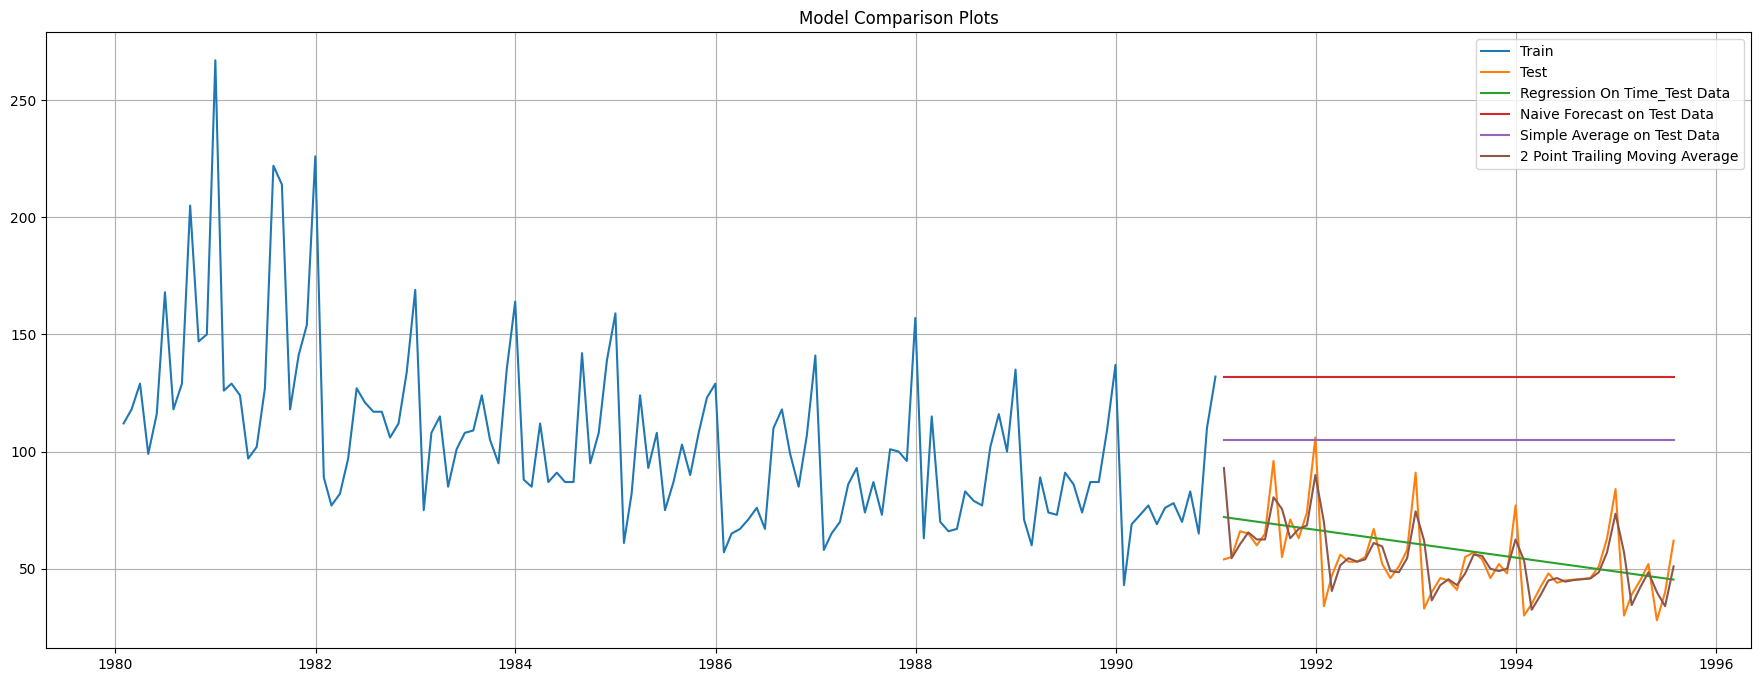

In [78]:
plt.figure(figsize=(22,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();


##Simple Exponential Smoothing

In [79]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [80]:
SES_train = train.copy()
SES_test = test.copy()

In [81]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])
model_SES_autofit = model_SES.fit(optimized=True)

In [82]:
model_SES_autofit.params

{'smoothing_level': 0.12362013466760018,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [83]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.983765
1991-02-28  55.0  87.983765
1991-03-31  66.0  87.983765
1991-04-30  65.0  87.983765
1991-05-31  60.0  87.983765

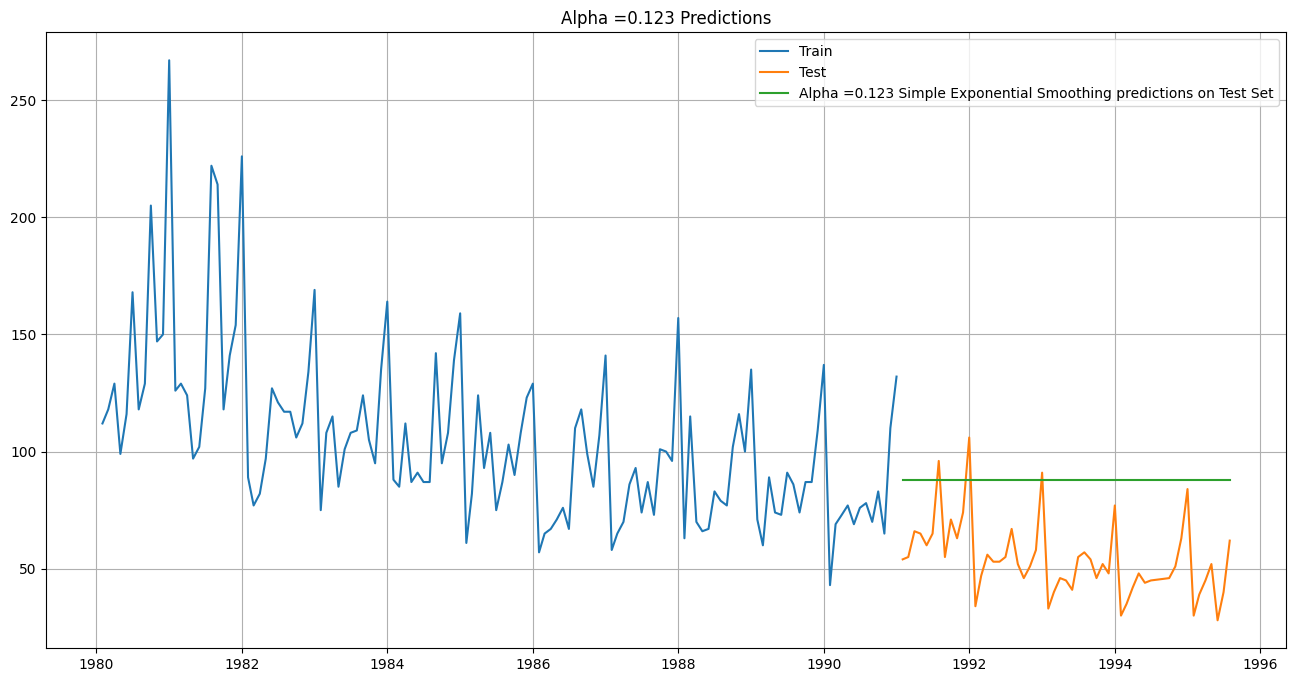

In [84]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.123 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.123 Predictions');

In [85]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.123 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.123 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 37.592


In [86]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.123,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        15.268955
NaiveModel                              79.718773
SimpleAverageModel                      53.460570
2pointTrailingMovingAverage             11.529278
4pointTrailingMovingAverage             14.451403
6pointTrailingMovingAverage             14.566327
9pointTrailingMovingAverage             14.727630
Alpha=0.123,SimpleExponentialSmoothing  37.592212

In [87]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [88]:
for i in np.arange(0.1,1,0.1):
 model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
 SES_train['predict',i] = model_SES_alpha_i.fittedvalues
 SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)

 rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)

 rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
 resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
                                   ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [89]:
resultsDf_6

Alpha Values  Train RMSE  Test RMSE
0           0.1   31.815610  36.828033
1           0.2   31.979391  41.361876
2           0.3   32.470164  47.504821
3           0.4   33.035130  53.767406
4           0.5   33.682839  59.641786
5           0.6   34.441171  64.971288
6           0.7   35.323261  69.698162
7           0.8   36.334596  73.773992
8           0.9   37.482782  77.139276

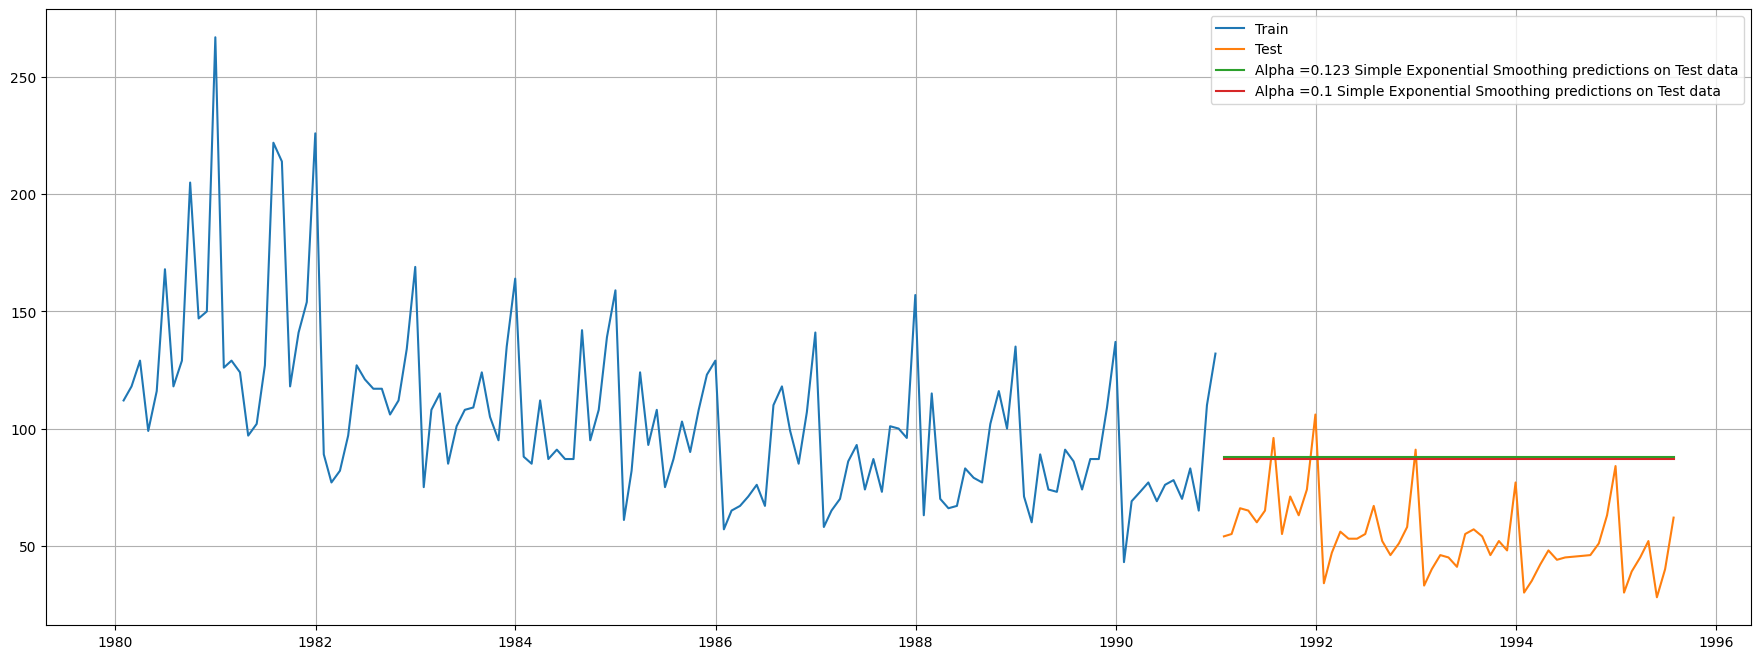

In [90]:
plt.figure(figsize=(22,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.123 Simple Exponential Smoothing predictions on Test data')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test data')
plt.legend(loc='best')
plt.grid();

In [91]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]

36.82803291069136

In [92]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
 ,index=['Alpha=0.1,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                        15.268955
NaiveModel                              79.718773
SimpleAverageModel                      53.460570
2pointTrailingMovingAverage             11.529278
4pointTrailingMovingAverage             14.451403
6pointTrailingMovingAverage             14.566327
9pointTrailingMovingAverage             14.727630
Alpha=0.123,SimpleExponentialSmoothing  37.592212
Alpha=0.1,SimpleExponentialSmoothing    36.828033

## Double Exponential Smoothing (Holt's Model)

In [93]:
DES_train=train.copy()
DES_test=test.copy()

In [94]:
len(test)

55

In [95]:
model_DES=Holt(DES_train["Rose"])

In [96]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [97]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)

        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)

        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)

        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [98]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   36.923416
1            0.1          0.2   33.450729   48.688648
2            0.1          0.3   33.145789   78.156641
3            0.1          0.4   33.262191   99.583473
4            0.1          0.5   33.688415  124.269726
..           ...          ...         ...         ...
95           1.0          0.6   51.831610  801.680218
96           1.0          0.7   54.497039  841.892573
97           1.0          0.8   57.365879  853.965537
98           1.0          0.9   60.474309  834.710935
99           1.0          1.0   63.873454  780.079579

[100 rows x 4 columns]

In [99]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  36.923416
1            0.1          0.2   33.450729  48.688648
10           0.2          0.1   33.097427  65.731702
2            0.1          0.3   33.145789  78.156641
20           0.3          0.1   33.611269  98.653317

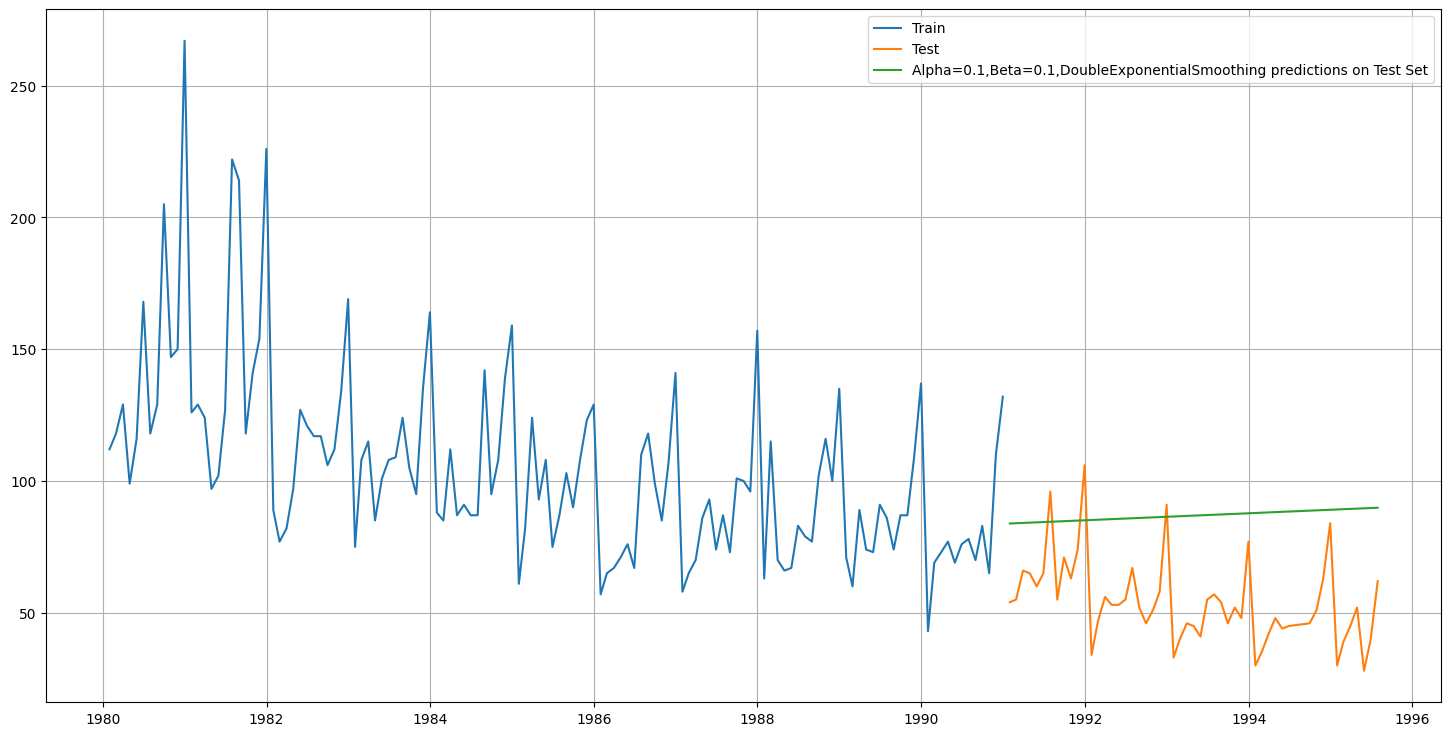

In [100]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.show();

In [101]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                               15.268955
NaiveModel                                     79.718773
SimpleAverageModel                             53.460570
2pointTrailingMovingAverage                    11.529278
4pointTrailingMovingAverage                    14.451403
6pointTrailingMovingAverage                    14.566327
9pointTrailingMovingAverage                    14.727630
Alpha=0.123,SimpleExponentialSmoothing         37.592212
Alpha=0.1,SimpleExponentialSmoothing           36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  36.923416

##Triple Exponential Smoothing (Holt - Winter's Model)

In [102]:
TES_train = train.copy()
TES_test = test.copy()

In [103]:
TES_train.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [104]:
TES_train.tail()

Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [105]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_autofit = model_TES.fit()

In [106]:
model_TES_autofit.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [107]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     55.942246
1991-02-28  55.0     63.240624
1991-03-31  66.0     68.899674
1991-04-30  65.0     60.007486
1991-05-31  60.0     67.257150

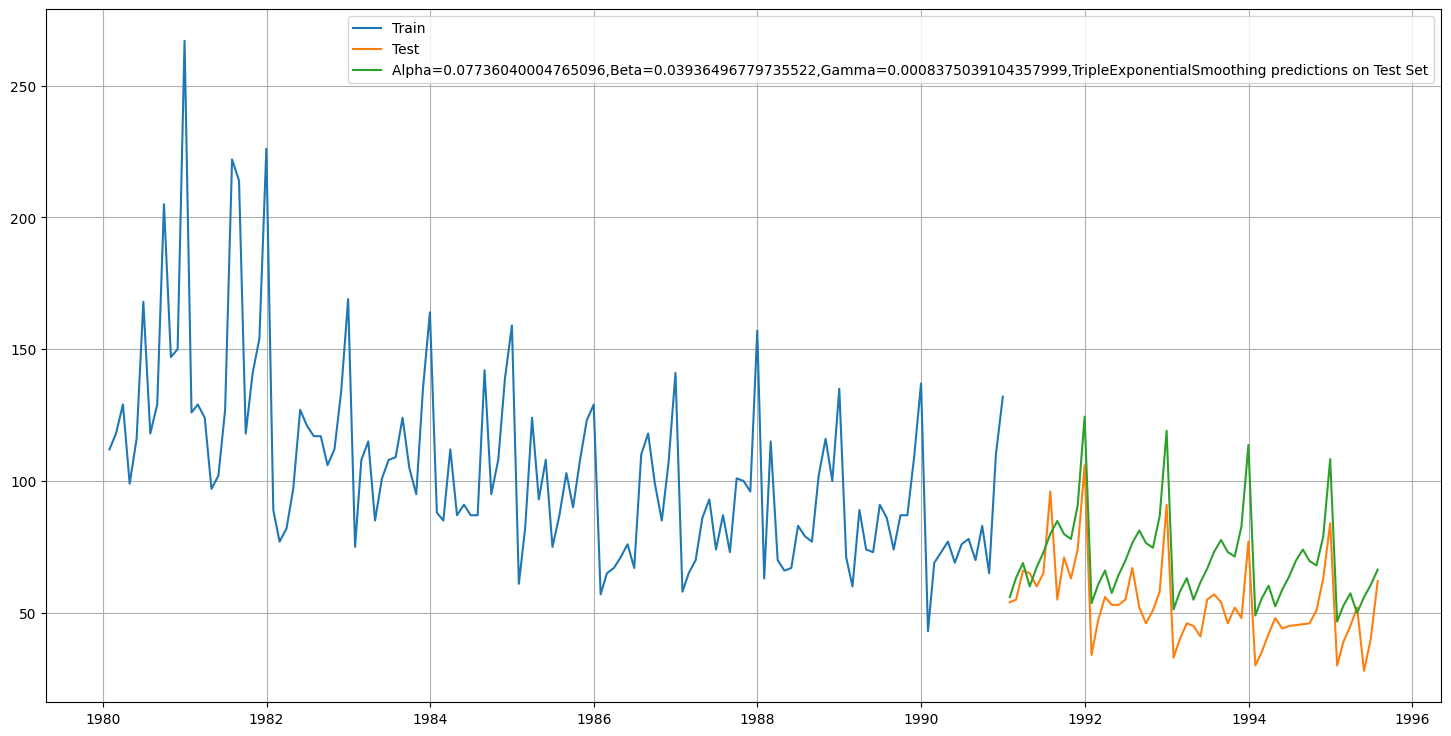

In [108]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.07736040004765096,Beta=0.03936496779735522,Gamma=0.0008375039104357999,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [109]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("Alpha=0.0773,Beta=0.0393,Gamma=0.0008, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Alpha=0.0773,Beta=0.0393,Gamma=0.0008, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 19.113


In [110]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.0773,Beta=0.0393,Gamma=0.0008,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.123,SimpleExponentialSmoothing              37.592212
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.0773,Beta=0.0393,Gamma=0.0008,TripleExp...  19.113110

In [111]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [112]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)

            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)

            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)

            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE    Test RMSE
0             0.1          0.1           0.1     19.535124    11.827223
1             0.1          0.1           0.2     20.068055    11.617688
2             0.1          0.1           0.3     20.714821    11.746627
3             0.1          0.1           0.4     21.459373    12.104519
4             0.1          0.1           0.5     22.307144    12.635337
..            ...          ...           ...           ...          ...
995           1.0          1.0           0.6   2140.632923  6630.658821
996           1.0          1.0           0.7   3091.001599  9721.144214
997           1.0          1.0           0.8   2438.212926  2573.842630
998           1.0          1.0           0.9  28835.801098  3522.899080
999           1.0          1.0           1.0   1577.905281  3104.659354

[1000 rows x 5 columns]

In [113]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
10            0.1          0.2           0.1   19.770392   9.223504
11            0.1          0.2           0.2   20.253487   9.496152
151           0.2          0.6           0.2   23.129850   9.565988
12            0.1          0.2           0.3   20.871304   9.888106
142           0.2          0.5           0.3   23.656276   9.891550

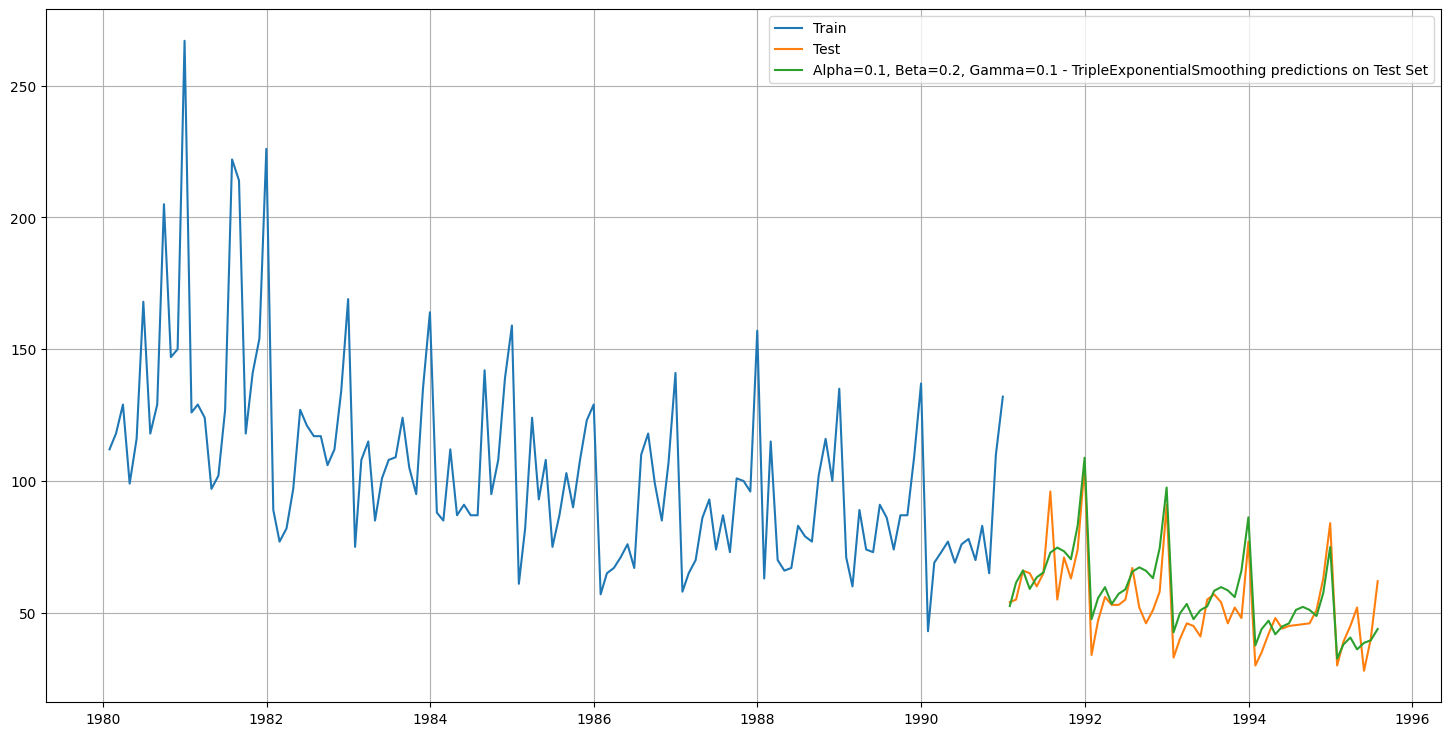

In [114]:
plt.figure(figsize=(18, 9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['predict',0.1,0.2,0.1], label='Alpha=0.1, Beta=0.2, Gamma=0.1 - TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.show();

In [115]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.123,SimpleExponentialSmoothing              37.592212
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.0773,Beta=0.0393,Gamma=0.0008,TripleExp...  19.113110
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504

In [116]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
RegressionOnTime                                    15.268955
Alpha=0.0773,Beta=0.0393,Gamma=0.0008,TripleExp...  19.113110
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.123,SimpleExponentialSmoothing              37.592212
SimpleAverageModel                                  53.460570
NaiveModel                                          79.718773

## Test for stationarity of the series - Dicky Fuller test

In [117]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

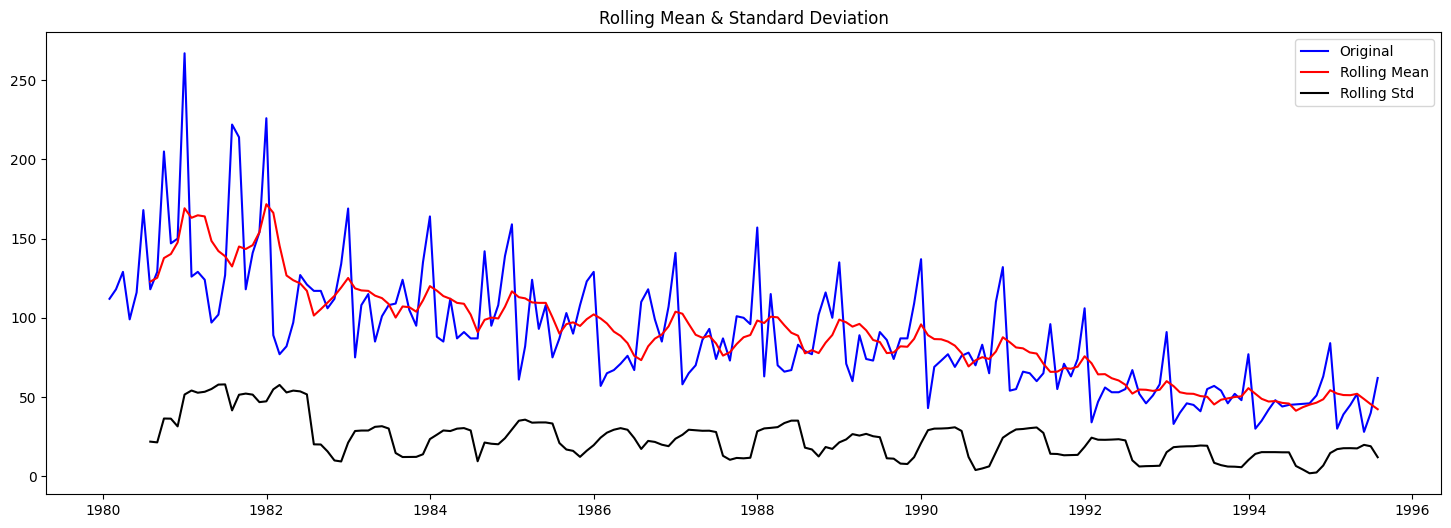

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [118]:
test_stationarity(rose_df['Rose'])

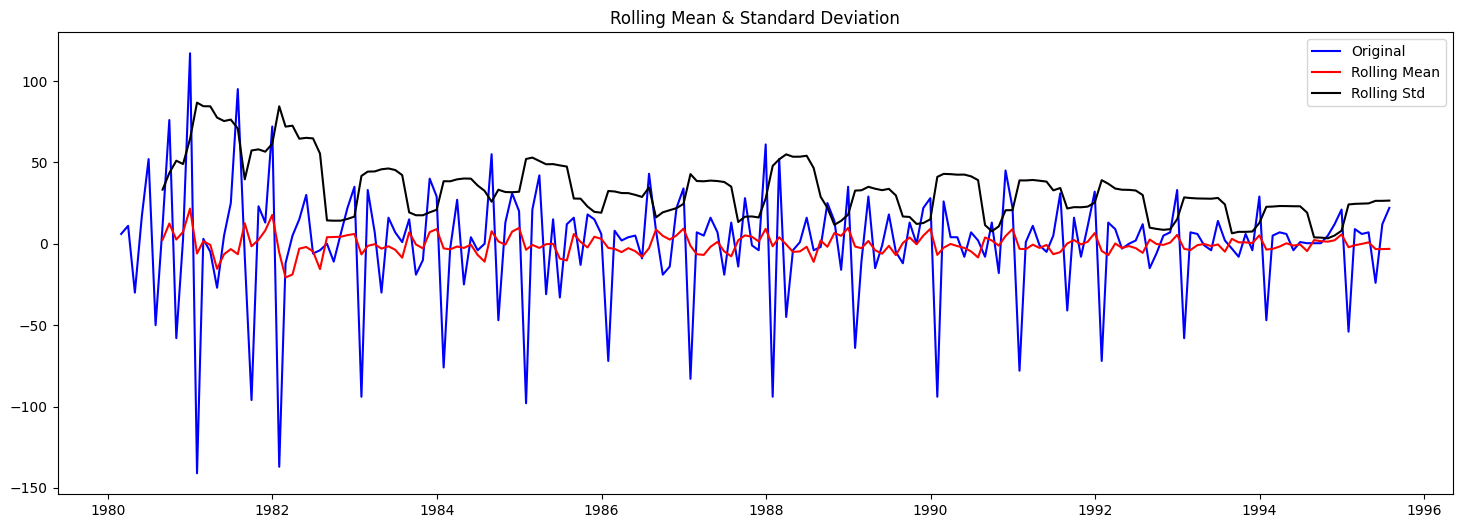

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



<Figure size 2000x800 with 0 Axes>

In [119]:
test_stationarity(rose_df['Rose'].diff().dropna())
plt.figure(figsize=(20, 8))
plt.show()

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

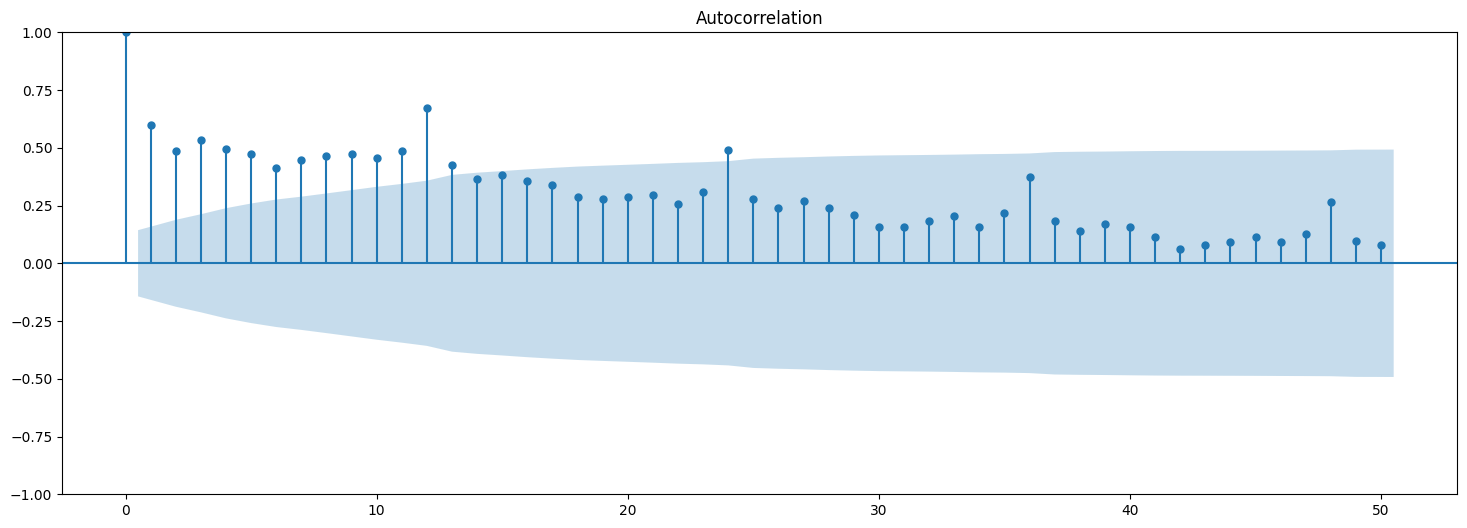

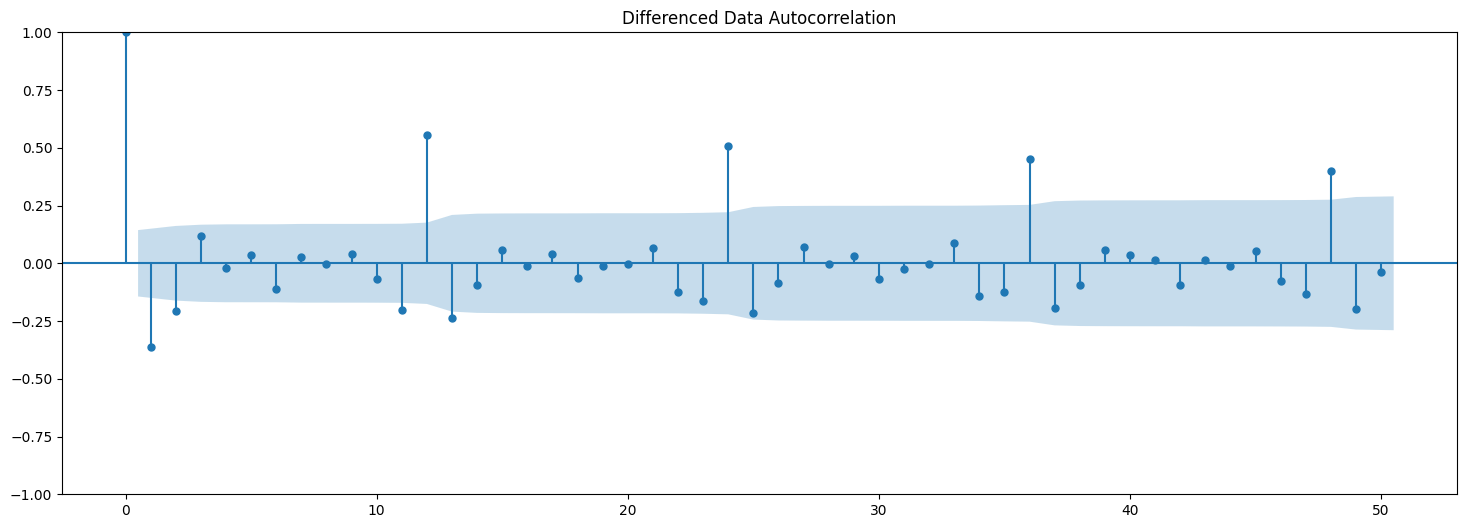

In [121]:
plot_acf(rose_df['Rose'],lags=50)
plot_acf(rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

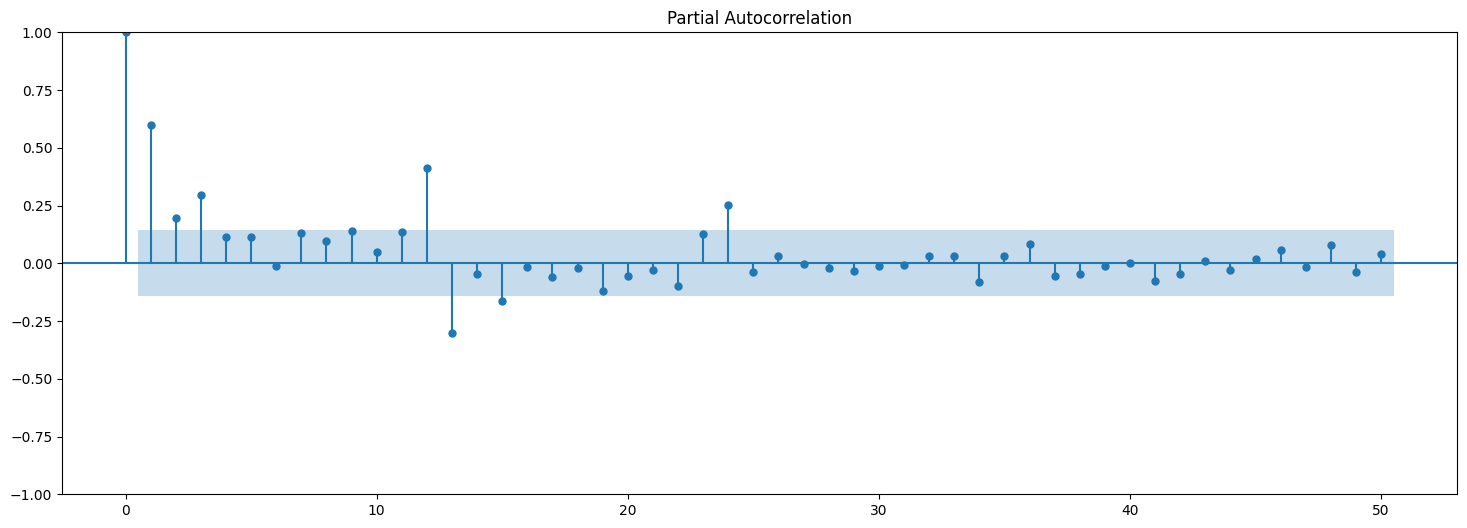

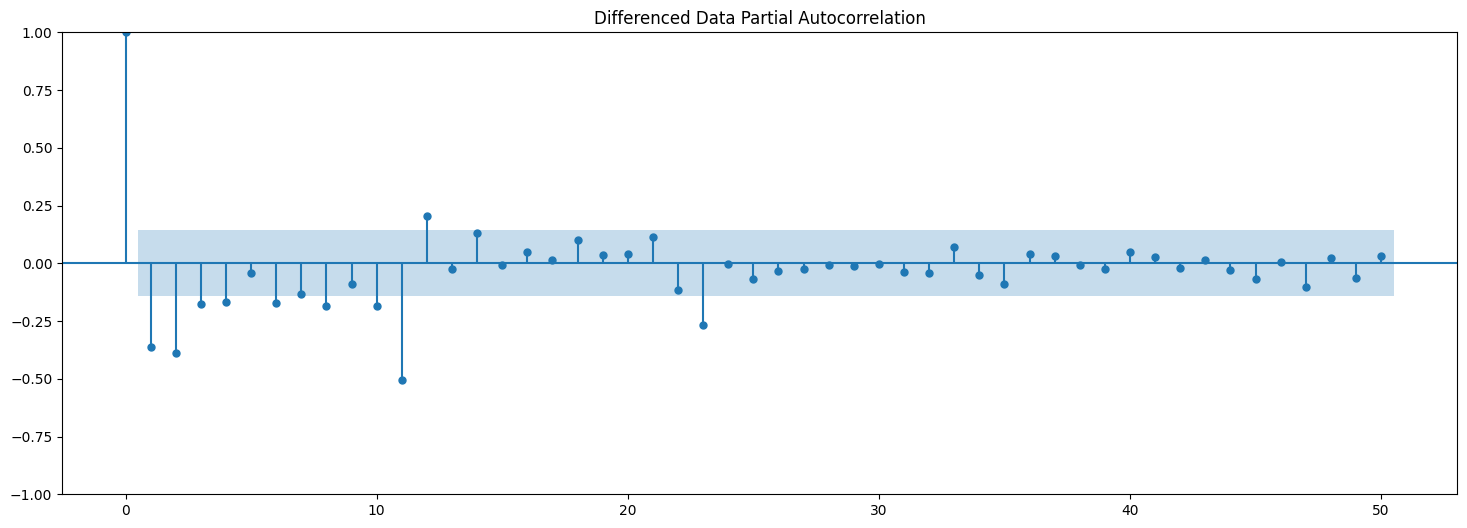

In [122]:
plot_pacf(rose_df['Rose'],lags=50)
plot_pacf(rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

##Check for stationarity of the Training Data Time Series

In [123]:
train_stat=train.copy()
test_stat=test.copy()

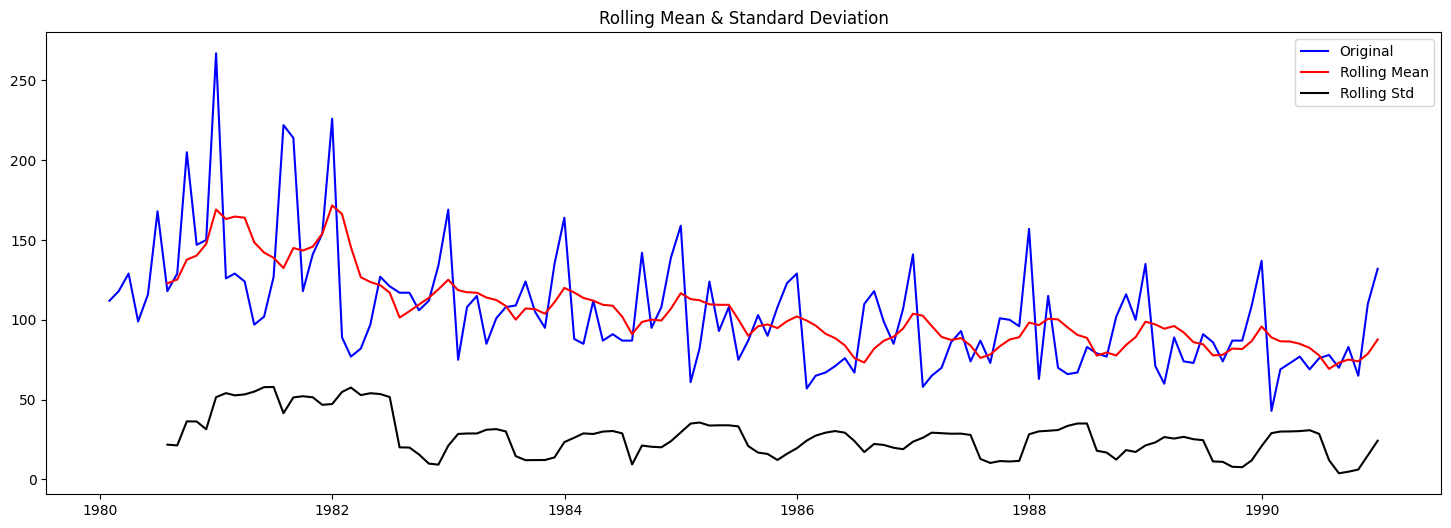

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [124]:
test_stationarity(train_stat['Rose'])

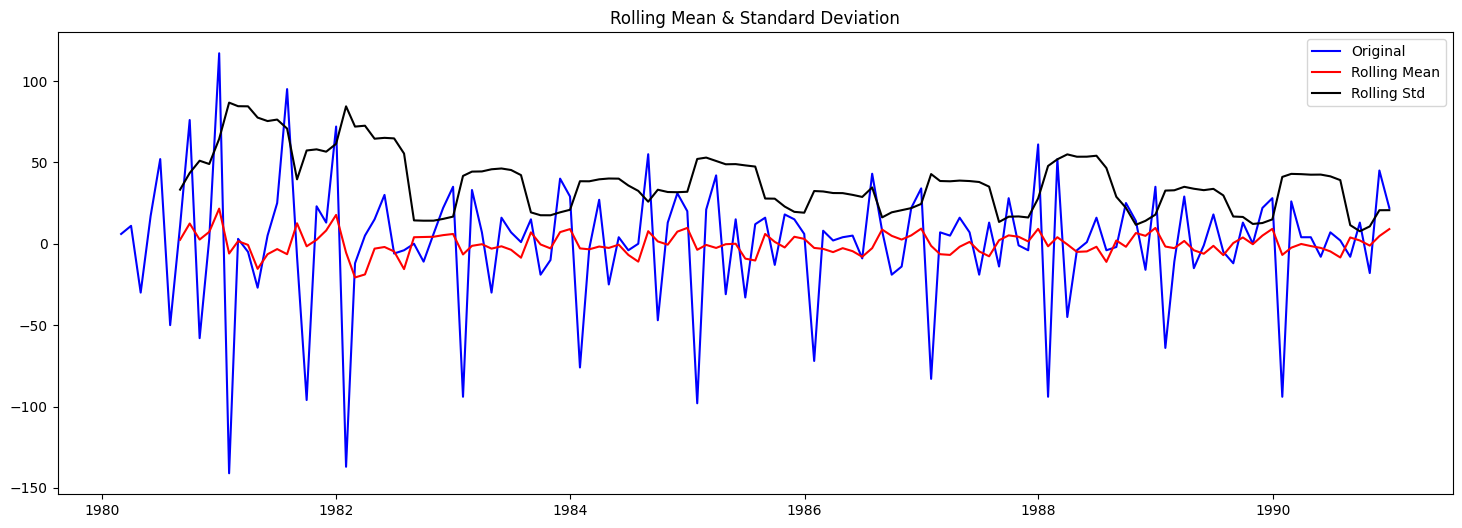

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [125]:
test_stationarity(train_stat['Rose'].diff().dropna())

In [126]:
train_stat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [127]:
import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [128]:
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [129]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train_stat['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:1324.8997029582783
ARIMA(0, 0, 1) - AIC:1305.4684058451076
ARIMA(0, 0, 2) - AIC:1306.587015380141
ARIMA(1, 0, 0) - AIC:1301.5463044401044
ARIMA(1, 0, 1) - AIC:1294.5105853006298
ARIMA(1, 0, 2) - AIC:1292.0532131041853
ARIMA(2, 0, 0) - AIC:1302.347684976567
ARIMA(2, 0, 1) - AIC:1292.9371947688596
ARIMA(2, 0, 2) - AIC:1292.2480559938977


In [130]:
ARMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
5  (1, 0, 2)  1292.053213
8  (2, 0, 2)  1292.248056
7  (2, 0, 1)  1292.937195
4  (1, 0, 1)  1294.510585
3  (1, 0, 0)  1301.546304
6  (2, 0, 0)  1302.347685
1  (0, 0, 1)  1305.468406
2  (0, 0, 2)  1306.587015
0  (0, 0, 0)  1324.899703

In [131]:
auto_ARIMA = ARIMA(train_stat['Rose'], order=(1,0,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -641.027
Date:                Sun, 10 Sep 2023   AIC                           1292.053
Time:                        15:45:23   BIC                           1306.467
Sample:                    01-31-1980   HQIC                          1297.910
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.8405     24.779      4.352      0.000      59.275     156.406
ar.L1          0.9861      0.027     36.818      0.000       0.934       1.039
ma.L1         -0.6874      0.090     -7.622      0.0

In [132]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_stat))

In [133]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_stat['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

45.43858946479077


In [134]:
resultsDf1a = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(1,0,2)'])

resultsDf1a

Test RMSE
ARIMA(1,0,2)  45.438589

In [135]:
resultsDf = pd.concat([resultsDf, resultsDf1a])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.123,SimpleExponentialSmoothing              37.592212
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.0773,Beta=0.0393,Gamma=0.0008,TripleExp...  19.113110
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
ARIMA(1,0,2)                                        45.438589

In [136]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [137]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [138]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_stat['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.309831974832
ARIMA(0, 1, 2) - AIC:1279.6715288535784
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380046
ARIMA(1, 1, 2) - AIC:1279.8707234231929
ARIMA(2, 1, 0) - AIC:1298.6110341604945
ARIMA(2, 1, 1) - AIC:1281.5078621868563
ARIMA(2, 1, 2) - AIC:1281.870722226456


In [139]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [140]:
auto_ARIMA = ARIMA(train_stat['Rose'], order=(0,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 10 Sep 2023   AIC                           1279.672
Time:                        15:45:24   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

In [141]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_stat))

In [142]:
rmse = mean_squared_error(test_stat['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

37.30647971907354


In [143]:
resultsDf1b = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf1b

Test RMSE
ARIMA(0,1,2)   37.30648

In [144]:
resultsDf = pd.concat([resultsDf, resultsDf1b])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.123,SimpleExponentialSmoothing              37.592212
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.0773,Beta=0.0393,Gamma=0.0008,TripleExp...  19.113110
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
ARIMA(1,0,2)                                        45.438589
ARIMA(0,1,2)                                        37.306480

In [145]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
RegressionOnTime                                    15.268955
Alpha=0.0773,Beta=0.0393,Gamma=0.0008,TripleExp...  19.113110
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
ARIMA(0,1,2)                                        37.306480
Alpha=0.123,SimpleExponentialSmoothing              37.592212
ARIMA(1,0,2)                                        45.438589
SimpleAverageModel                                  53.460570
NaiveModel                                          79.718773

<Figure size 1800x800 with 0 Axes>

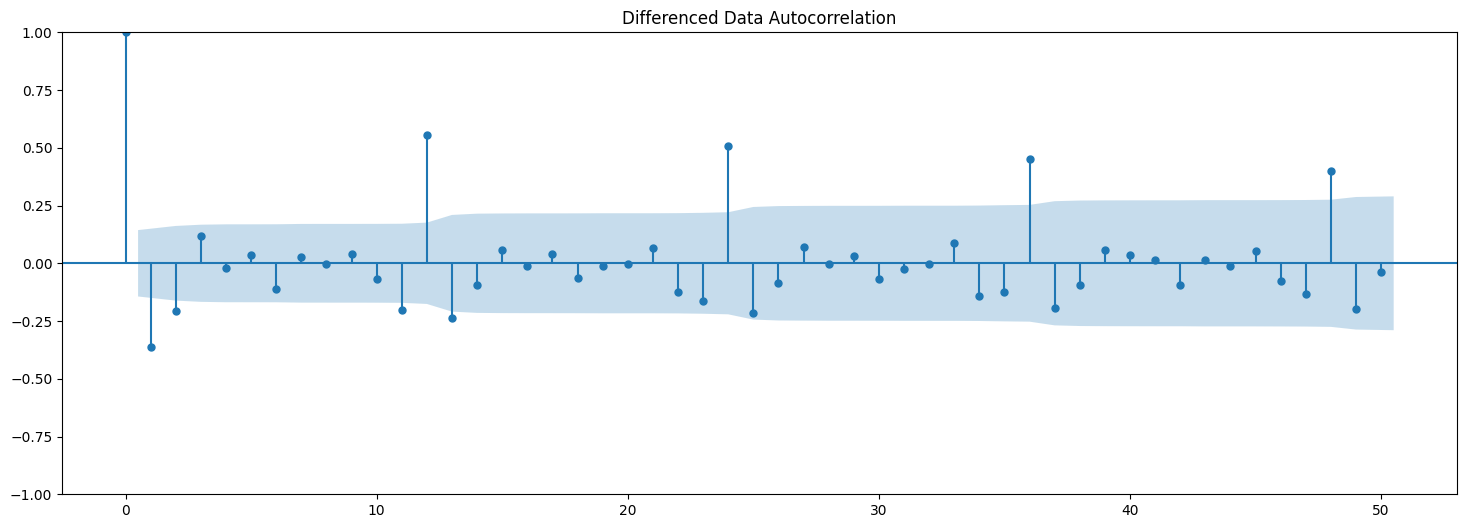

In [146]:
plt.figure(figsize=(18, 8))
plot_acf(rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [147]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [148]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [149]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_stat['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113854
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827386
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149143
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721269
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515151
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426131708
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029557
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752784
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745046
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746457
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564124653474
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982476
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.645518764942
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.004408262805
SARIMA(0, 1, 2)x(0, 0, 0, 6) -

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1091.7082778420809
SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1041.6558183805287
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1231.963073454043
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1128.9876565220643
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:1219.0664587880906
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:1186.6130717491167
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1111.670248069002
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1099.0398509026213
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1093.0537127081243
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1078.6114741768044
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:1263.2315231795724
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1201.4126986467897
SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1092.4754616553787
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:1199.8335862393578
SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1161.5686919138057
SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1079.8188703387534
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1071.6995915092257
SARIMA(2, 1, 1)x(2, 0, 1, 6) -

In [150]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1041.655818
26  (0, 1, 2)  (2, 0, 2, 6)  1043.600261
80  (2, 1, 2)  (2, 0, 2, 6)  1045.230049
71  (2, 1, 1)  (2, 0, 2, 6)  1051.673461
44  (1, 1, 1)  (2, 0, 2, 6)  1052.778470

In [151]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_stat['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 10 Sep 2023   AIC                           1041.656
Time:                                   15:45:38   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.152     -3.899      0.000      -0.893      -0.295
ma.L1         -0.1954    122.598     -0.002

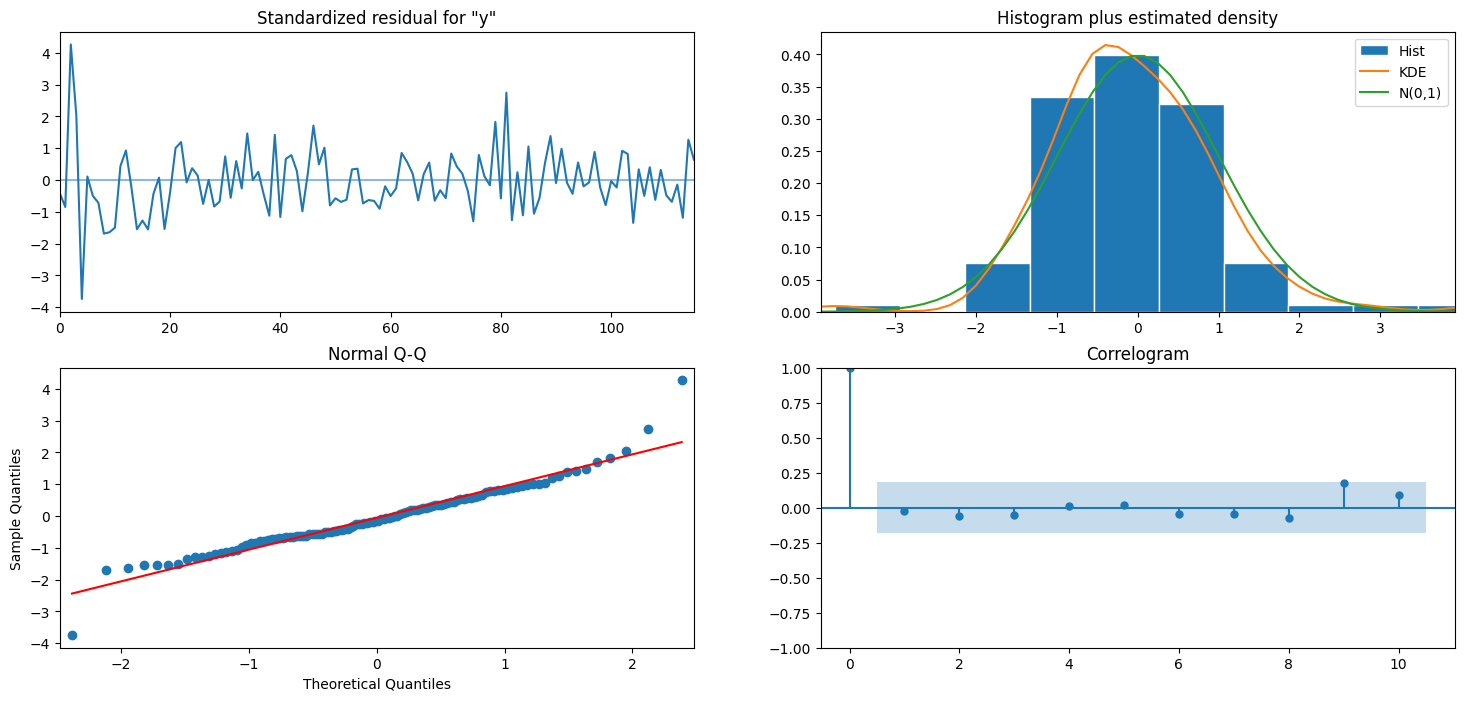

In [152]:
results_auto_SARIMA_6.plot_diagnostics(figsize=(18,8))
plt.show()

In [153]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test_stat))

In [154]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.838344  18.848519      25.895925      99.780763
1  67.628830  19.300294      29.800948     105.456711
2  74.745289  19.412843      36.696815     112.793763
3  71.323939  19.475788      33.152096     109.495782
4  76.016004  19.484068      37.827933     114.204075

In [155]:
rmse = mean_squared_error(test_stat['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

26.133356913074714


In [156]:
resultsDf2 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1, 1, 2)(2, 0, 2, 6)'])

resultsDf2

Test RMSE
SARIMA(1, 1, 2)(2, 0, 2, 6)  26.133357

In [157]:
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

Test RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.123,SimpleExponentialSmoothing              37.592212
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
Alpha=0.0773,Beta=0.0393,Gamma=0.0008,TripleExp...  19.113110
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
ARIMA(1,0,2)                                        45.438589
ARIMA(0,1,2)                                        37.306480
SARIMA(1, 1, 2)(2, 0, 2, 6)                         26.133357

In [158]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...   9.223504
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
RegressionOnTime                                    15.268955
Alpha=0.0773,Beta=0.0393,Gamma=0.0008,TripleExp...  19.113110
SARIMA(1, 1, 2)(2, 0, 2, 6)                         26.133357
Alpha=0.1,SimpleExponentialSmoothing                36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.923416
ARIMA(0,1,2)                                        37.306480
Alpha=0.123,SimpleExponentialSmoothing              37.592212
ARIMA(1,0,2)                                        45.438589
SimpleAverageModel                                  53.460570
NaiveModel                                          79.718773

In [159]:
fullmodel1 = ExponentialSmoothing(rose_df,
                                  trend='add', seasonal='mul', seasonal_periods=12)
fitted_model = fullmodel1.fit(smoothing_level=0.1, smoothing_slope=0.2, smoothing_seasonal=0.1)
print(fitted_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Rose   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                          54193.825
Optimized:                         True   AIC                           1092.143
Trend:                         Additive   BIC                           1143.841
Seasonal:                Multiplicative   AICC                          1096.214
Seasonal Periods:                    12   Date:                 Sun, 10 Sep 2023
Box-Cox:                          False   Time:                         15:45:39
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

In [160]:
RMSE_fullmodel1 = np.sqrt(mean_squared_error(rose_df['Rose'], fitted_model.fittedvalues))
print('RMSE:', RMSE_fullmodel1)

RMSE: 17.023705516791587


In [161]:
forecast = fitted_model.forecast(steps=12)

In [162]:
print("Forecasted values for the next 12 months:")
print(forecast)

Forecasted values for the next 12 months:
1995-08-31    50.084259
1995-09-30    49.875177
1995-10-31    50.832612
1995-11-30    59.191101
1995-12-31    82.350415
1996-01-31    33.714576
1996-02-29    40.789236
1996-03-31    46.086829
1996-04-30    44.925081
1996-05-31    43.083063
1996-06-30    47.998045
1996-07-31    54.895117
Freq: M, dtype: float64


In [163]:
forecast_df = pd.DataFrame({'ForecastedValues': forecast})
forecast_summary = forecast_df.describe(percentiles=[0.05, 0.95])

print("Summary of Forecasted Values:")
print(forecast_summary)

Summary of Forecasted Values:
       ForecastedValues
count         12.000000
mean          50.318792
std           12.050866
min           33.714576
5%            37.605639
50%           48.936611
95%           69.612792
max           82.350415


In [164]:
pred_1_df = pd.DataFrame({'lower_CI':forecast - 1.96*np.std(fitted_model.resid,ddof=1),
                        'prediction':forecast,
                        'upper_ci': forecast + 1.96*np.std(fitted_model.resid,ddof=1)})

In [165]:
pred_1_df

lower_CI  prediction    upper_ci
1995-08-31  16.636544   50.084259   83.531973
1995-09-30  16.427462   49.875177   83.322892
1995-10-31  17.384897   50.832612   84.280326
1995-11-30  25.743386   59.191101   92.638816
1995-12-31  48.902700   82.350415  115.798129
1996-01-31   0.266862   33.714576   67.162291
1996-02-29   7.341521   40.789236   74.236951
1996-03-31  12.639114   46.086829   79.534543
1996-04-30  11.477366   44.925081   78.372795
1996-05-31   9.635348   43.083063   76.530778
1996-06-30  14.550330   47.998045   81.445760
1996-07-31  21.447403   54.895117   88.342832

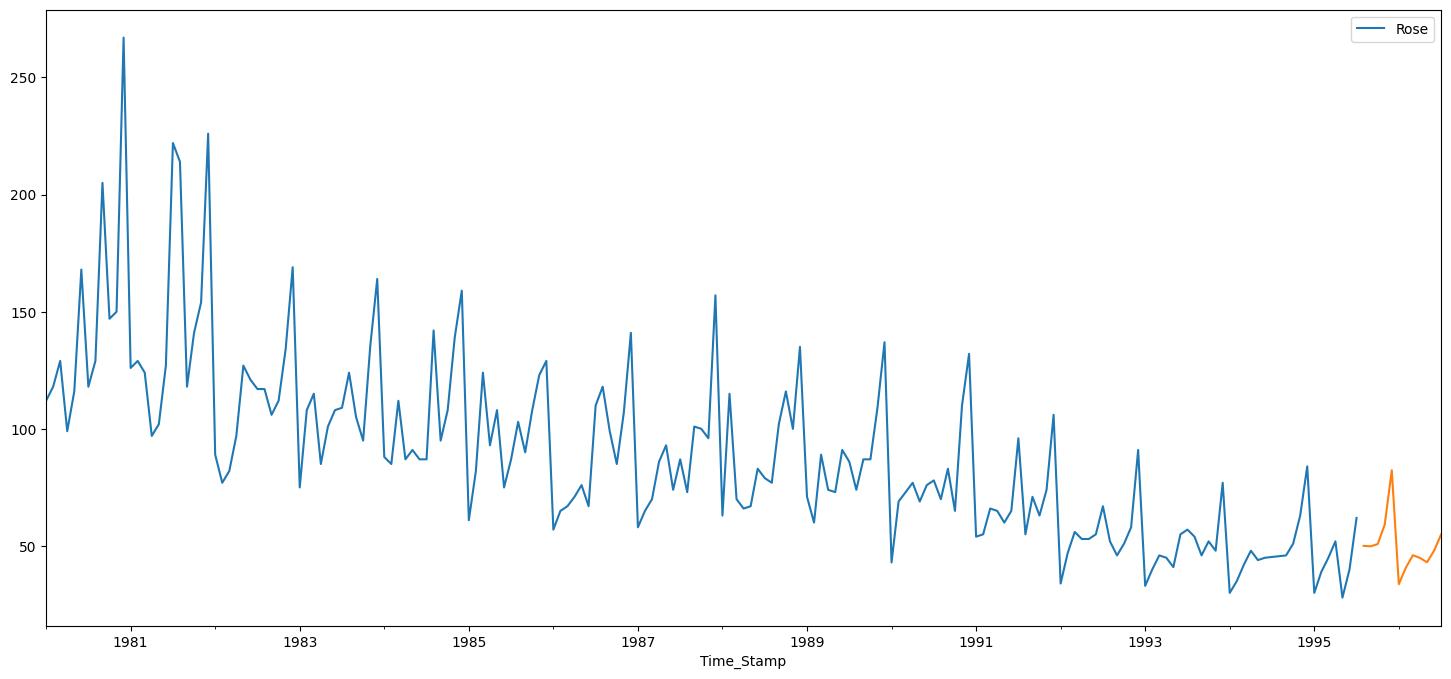

In [166]:
rose_df.plot(figsize=(18,8))
forecast.plot();

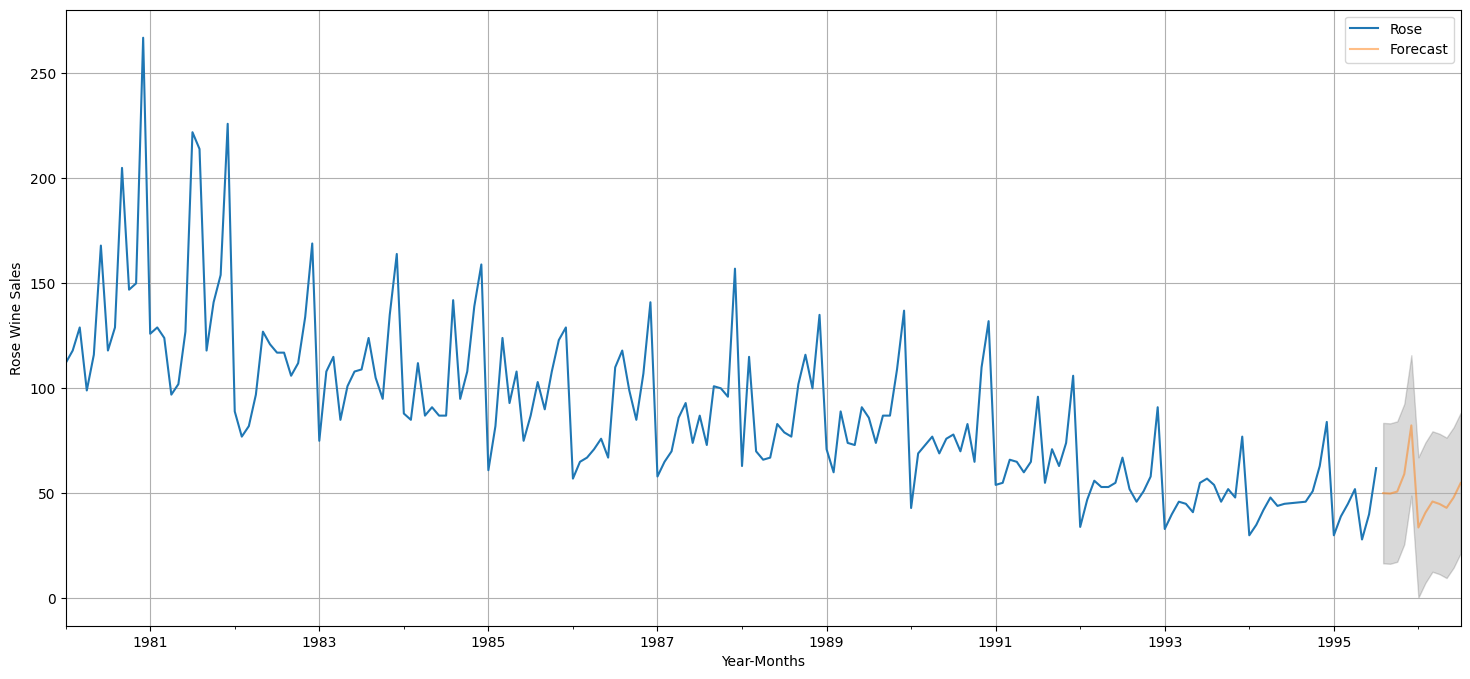

In [167]:
axis = rose_df.plot(label='Actual', figsize=(18,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5), axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'],pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose Wine Sales')
plt.legend(loc='best')
plt.grid();
plt.show();